# 2. Filtering diad files into categories
- This workbook shows how to filter cosmic rays and filter diad files into 3 categories, to allow easier fitting
- This data is from Devitre et al. (2021), collected from acqusitions on a high pressure optical cell on the Cornell WITec Alpha300R. 

In [1]:
# Import useful python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import os

C:\Users\charl\AppData\Local\Temp\ipykernel_21960\4289795608.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Downloading DiadFit locally
- The easiest way to install diad fit is by removing the #. It will install from PyPI
- You only need to do this once on each computer, or run in order to grab an updated version. 

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [2]:
import DiadFit as pf
pf.__version__

'0.0.59'

## Get the folder to your files
- If this notebook is in the same folder as your files, you can use os. to get the file name. Else paste in the file name as DayFolder='C:/Penny' or whatever you use on your computer. 
- In this case, Spectra files are stored in one subfolder called 'Spectra', Metadata files in another subfolder called 'MetaData'

In [5]:
MasterFolder=r"C:\Users\charl\Documents\Instruments and calibrations"
DayFolder=MasterFolder + "/UCB_6-7-23"

if not os.path.exists(MasterFolder + '\OUTPUT'):
    os.mkdir(MasterFolder +'\OUTPUT')
if not os.path.exists(MasterFolder + '\OUTPUT'+'\Pickles'):
    os.mkdir(MasterFolder + '\OUTPUT'+'\Pickles')

if not os.path.exists(DayFolder + '\GROUPS'):
    os.mkdir(DayFolder +'\GROUPS')

if not os.path.exists(DayFolder + '\FITOUT'):
    os.mkdir(DayFolder +'\FITOUT')


meta_path=DayFolder +  '\METADATA'
spectra_path=DayFolder + '\SPECTRA'

output_path=MasterFolder +"\OUTPUT"
fitout_path=DayFolder+'\FITOUT'
group_path=DayFolder+'\GROUPS'

filetype='headless_txt'

## This function finds all files in your path with the specified file format
- Specify information about your file formats here, as well as any text in filenames that you dont want to fit. 

In [6]:
filetype='headless_txt' # Specifies raman file format, here a text file with no header
file_ext='.txt' # File extension, a txt file
prefix=False # File doesn't have a 01, 02 prefix, as WItec can add
exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Spectrum','CRR'] # Exclude files with these strings in
Diad_Files=pf.get_files(path=spectra_path, file_ext=file_ext, 
            exclude_str=exclude_str)
print(Diad_Files)

['FDCA-P1-1.txt', 'FDCA-P1-2.txt', 'FDCA-P1-3.txt', 'FDCA-P10-1.txt', 'FDCA-P11-1.txt', 'FDCA-P12-1.txt', 'FDCA-P13-1.txt', 'FDCA-P14-1.txt', 'FDCA-P14-2.txt', 'FDCA-P14-3.txt', 'FDCA-P15-1.txt', 'FDCA-P16-1.txt', 'FDCA-P17-1.txt', 'FDCA-P18-1.txt', 'FDCA-P19-1.txt', 'FDCA-P19-2.txt', 'FDCA-P19-3.txt', 'FDCA-P2-1.txt', 'FDCA-P2-2.txt', 'FDCA-P2-3.txt', 'FDCA-P20-1.txt', 'FDCA-P21-1.txt', 'FDCA-P22-1.txt', 'FDCA-P23-1.txt', 'FDCA-P23-2.txt', 'FDCA-P23-3.txt', 'FDCA-P24-1.txt', 'FDCA-P25-1.txt', 'FDCA-P26-1.txt', 'FDCA-P27-1.txt', 'FDCA-P27-2.txt', 'FDCA-P27-3.txt', 'FDCA-P28-1.txt', 'FDCA-P29-1.txt', 'FDCA-P3-1.txt', 'FDCA-P3-2.txt', 'FDCA-P3-3.txt', 'FDCA-P30-1.txt', 'FDCA-P30-2.txt', 'FDCA-P30-3.txt', 'FDCA-P4-1.txt', 'FDCA-P4-2.txt', 'FDCA-P4-3.txt', 'FDCA-P5-1.txt', 'FDCA-P5-2.txt', 'FDCA-P5-3.txt', 'FDCA-P6-1.txt', 'FDCA-P6-2.txt', 'FDCA-P6-3.txt', 'FDCA-P7-1.txt', 'FDCA-P7-2.txt', 'FDCA-P7-3.txt', 'FDCA-P8-1.txt', 'FDCA-P8-2.txt', 'FDCA-P8-3.txt', 'FDCA-P9-1.txt', 'FDCA-P9-2.txt',

## Find approximate peak positions
- Tweak Scipy parameters to find the diad peaks
- Tweak these parameters to make sure Scipy 'find_peaks' gets your diad peaks for your instrument.
- Prominence: most useful parameter, required prominence of peaks
- height: Minimum height of peaks, not that useful with various background positions
- distance: Used to help with peaks that are very close to one another, smaller distance, remove peaks until keep set distance apart
- width: Minimum width of peaks

In [7]:
# Tweak parameters away from the default here
diad_id_config=pf.diad_id_config(prominence=12, width=1)
diad_id_config

diad_id_config(height=1, width=1, prominence=12, plot_figure=True, exclude_range1=None, exclude_range2=None, approx_diad2_pos=(1379, 1395), approx_diad1_pos=(1275, 1290), Diad2_window=(1349, 1425), Diad1_window=(1245, 1320), approx_diad2_pos_3peaks=(1379, 1395, 1362))

filename  approx_split    Diad1_pos    Diad2_pos      HB1_pos  \
8  FDCA-P1-1.txt    105.603635  1281.218121  1386.821757  1261.172019   

       HB2_pos      C13_pos  Diad1_abs_prom  Diad2_abs_prom  HB1_abs_prom  \
8  1408.314258  1369.668453      7742.15509    15102.679222    337.091412   

   ...   HB2_height   C13_height  Diad1_height  HB1_height  Diad1_Median_Bck  \
8  ...  1247.794378  1127.746712   8488.555084   1036.8914        746.399994   

   Diad2_Median_Bck  C13_HB2_abs_prom_ratio  Diad2_HB2_Valley_prom  \
8        750.600006                2.247872               1.292061   

   HB1_prom/std_betweendiads  HB2_prom/std_betweendiads  
8                   70.73503                 113.228111  

[1 rows x 39 columns]

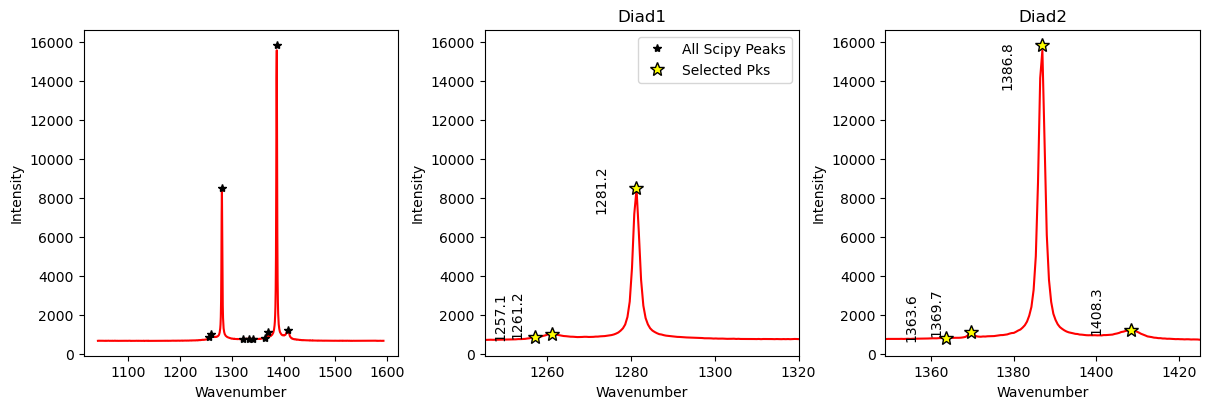

In [8]:
# Check it has found the peaks of interest. Here we are looking at the 1st file
df_peaks, Diad, fig=pf.identify_diad_peaks(
config=diad_id_config, 
path=spectra_path, filename=Diad_Files[0],
filetype=filetype, plot_figure=True)
## 'POC54.txt' Diad_Files[50] is problematic for HB IDing
df_peaks

### Now you have looked at a few files and are happy with these parameters, loop over all files to get approximate fit parameters for all your diad acquisitions

In [9]:
fit_params, data_y_all=pf.loop_approx_diad_fits(spectra_path=spectra_path, config=diad_id_config, 
                       Diad_Files=Diad_Files, filetype=filetype, plot_figure=False)
fit_params.head()

100%|██████████| 58/58 [00:01<00:00, 38.75it/s]


filename  approx_split    Diad1_pos    Diad2_pos      HB1_pos  \
0   FDCA-P1-1.txt    105.603635  1281.218121  1386.821757  1261.172019   
1   FDCA-P1-2.txt    105.603635  1281.212622  1386.816257  1260.941036   
2   FDCA-P1-3.txt    105.614634  1281.207122  1386.821757  1261.364506   
3  FDCA-P10-1.txt    105.152667  1281.883575  1387.036242  1262.084956   
4  FDCA-P11-1.txt    105.114169  1281.944071  1387.058240  1261.677984   

       HB2_pos      C13_pos  Diad1_abs_prom  Diad2_abs_prom  HB1_abs_prom  \
0  1408.314258  1369.668453     7742.155090    15102.679222    337.091412   
1  1407.824792  1369.657454     7843.598852    15256.554995    332.213626   
2  1408.490245  1369.657454     7747.430640    15001.051228    335.251919   
3  1408.578239  1369.662953     6488.939724    12501.510686    303.753612   
4  1409.040207  1369.717949     6426.205778    12307.518520    304.927497   

   ...   HB2_height   C13_height  Diad1_height   HB1_height  Diad1_Median_Bck  \
0  ...  1247.794378  1127.746712   8488.555084  1036.891400        746.399994   
1  ...  1251.610154  1128.446032   8588.798834  1031.013614        745.199982   
2  ...  1240.762165  1116.857289   8490.830634  1033.251919        743.399994   
3  ...  1176.671565  1032.078452   7212.639736   992.153636        723.700012   
4  ...  1165.523992  1026.866841   7147.805784   992.327522        721.600006   

   Diad2_Median_Bck  C13_HB2_abs_prom_ratio  Diad2_HB2_Valley_prom  \
0        750.600006                2.247872               1.292061   
1        749.099976                2.280892               1.300497   
2        747.500000                2.304572               1.300579   
3        727.349991                2.388989               1.216004   
4        725.000000                2.391696               1.197032   

   HB1_prom/std_betweendiads  HB2_prom/std_betweendiads  
0                  70.735030                 113.228111  
1                  66.835549                 109.646479  
2                  66.979153                 106.798852  
3                 122.349085                 193.730811  
4                 104.697402                 161.829932  

[5 rows x 39 columns]

## Filter cosmic rays
### Pick a spectrum to tweak first

FDCA-P1-1.txt


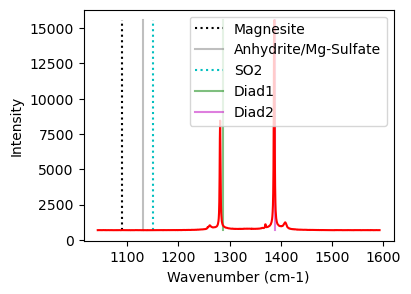

In [10]:
Diad_files=fit_params['filename']
i=0
filename_select=Diad_files.iloc[i] 
print(Diad_Files[i])
plot1=pf.plot_diad(path=spectra_path, filename=filename_select, filetype=filetype)

### Pick your other parameters
- NOTE that you can also change the number of neighbors considered in the intensity factor (n),but n=1 is often the best. dynfact is the intensity factor cutoff above which pixels are considered outliers in the first pass (y axis on the first plot on the leftmost). dynfact_2 is the same, but for the second pass. The filter automatically disregards pixels that are known to be of interest (here diads, hbs and c13). 


In [11]:
# This extract the peaks for the diads, HBs and C13 from fit_params, essential to the CRR process.
diad_peaks=fit_params[['Diad1_pos','Diad2_pos','HB1_pos','HB2_pos','C13_pos']]

#Pick your settings
plot_rays='all'#whether to plot the results, options are 'all' or 'rays_only'
export_cleanspec=True #whether to export the spectra with the cosmic ray pixels removed
save_fig='all' #whether to save the figures, options are 'all' or 'rays_only'
dynfact=0.0005 #dynamic intensity factor for the first pass (y axis on the leftmost plots)
dynfact_2=0.0005#dynamic intensity factor for the second pass
n=1 # number of neighboring pixels being compared, typically 1 is ideal.

exclude_ranges=None#[(1140,1160)] # List of tuples containing ranges to exclude from filtering (i.e., for secondary peaks)

### Run the filter on the selected spectrum

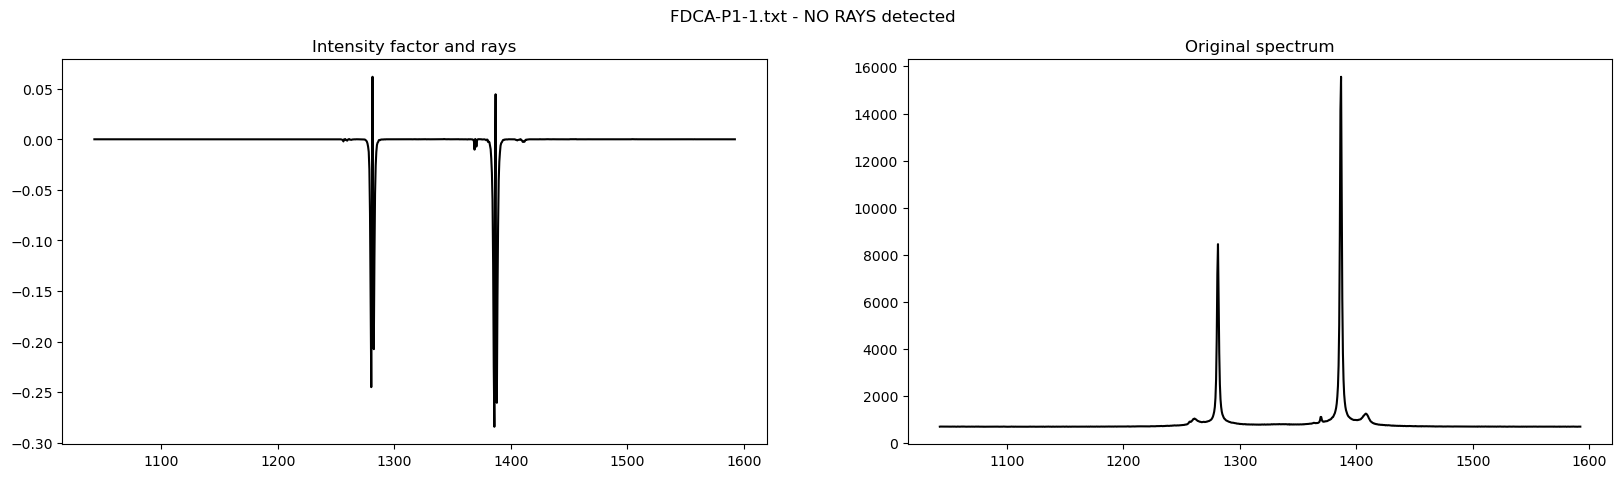

In [12]:
rays_found,spectrum=pf.cosmicray_filter.filter_singleray(path=spectra_path,Diad_files=Diad_files,i=i,diad_peaks=diad_peaks,
                                                         exclude_ranges=exclude_ranges,
                                                         plot_rays=plot_rays,
                                      export_cleanspec=export_cleanspec,save_fig=save_fig,dynfact=dynfact,dynfact_2=dynfact_2,n=n)

#rays_found is a dataframe containing the filename and whether cosmic rays were found. spectrum is the filtered spectrum in the form of a dataframe. 
#It contains nan values where the cosmic rays are. It is NOT for fitting.

### Now Loop over all other spectra
- the output of this is the data_y_all file, which contains plottable spectra and the new fit_params file with filtered spectra

In [13]:
fit_params

filename  approx_split    Diad1_pos    Diad2_pos      HB1_pos  \
0    FDCA-P1-1.txt    105.603635  1281.218121  1386.821757  1261.172019   
1    FDCA-P1-2.txt    105.603635  1281.212622  1386.816257  1260.941036   
2    FDCA-P1-3.txt    105.614634  1281.207122  1386.821757  1261.364506   
3   FDCA-P10-1.txt    105.152667  1281.883575  1387.036242  1262.084956   
4   FDCA-P11-1.txt    105.114169  1281.944071  1387.058240  1261.677984   
5   FDCA-P12-1.txt    105.070172  1282.021065  1387.091238  1262.194948   
6   FDCA-P13-1.txt    105.015176  1282.114559  1387.129735  1261.881470   
7   FDCA-P14-1.txt    104.976679  1282.175055  1387.151734  1262.101455   
8   FDCA-P14-2.txt    104.976679  1282.175055  1387.151734  1262.376435   
9   FDCA-P14-3.txt    104.960180  1282.186054  1387.146234  1261.919967   
10  FDCA-P15-1.txt    104.938182  1282.252049  1387.190231  1262.194948   
11  FDCA-P16-1.txt    104.910684  1282.318045  1387.228728  1262.277442   
12  FDCA-P17-1.txt    104.894185  1282.373041  1387.267226  1262.156451   
13  FDCA-P18-1.txt    104.888685  1282.422537  1387.311223  1262.315940   
14  FDCA-P19-1.txt    104.855687  1282.494032  1387.349720  1262.464429   
15  FDCA-P19-2.txt    104.872186  1282.483033  1387.355219  1262.266443   
16  FDCA-P19-3.txt    104.861187  1282.494032  1387.355219  1262.414933   
17   FDCA-P2-1.txt    105.559638  1281.284117  1386.843755  1261.738480   
18   FDCA-P2-2.txt    105.559638  1281.284117  1386.843755  1261.452500   
19   FDCA-P2-3.txt    105.559638  1281.284117  1386.843755  1261.100524   
20  FDCA-P20-1.txt    104.833689  1282.549029  1387.382718  1262.502927   
21  FDCA-P21-1.txt    104.784192  1282.631523  1387.415715  1262.475429   
22  FDCA-P22-1.txt    104.734696  1282.708518  1387.443213  1262.497427   
23  FDCA-P23-1.txt    104.696198  1282.774513  1387.470711  1262.876901   
24  FDCA-P23-2.txt    104.696198  1282.774513  1387.470711  1262.821904   
25  FDCA-P23-3.txt    104.679700  1282.785512  1387.465212  1262.563422   
26  FDCA-P24-1.txt    104.652202  1282.840508  1387.492710  1262.794406   
27  FDCA-P25-1.txt    104.619204  1282.895504  1387.514708  1262.816405   
28  FDCA-P26-1.txt    104.591706  1282.945001  1387.536707  1263.179379   
29  FDCA-P27-1.txt    104.558708  1283.005497  1387.564205  1262.645917   
30  FDCA-P27-2.txt    104.575207  1282.988998  1387.564205  1262.931897   
31  FDCA-P27-3.txt    104.547709  1283.010996  1387.558705  1263.151881   
32  FDCA-P28-1.txt    104.536710  1283.076992  1387.613701  1262.414933   
33  FDCA-P29-1.txt    104.393720  1283.280478  1387.674197  1263.811835   
34   FDCA-P3-1.txt    105.515641  1281.355612  1386.871253  1261.067527   
35   FDCA-P3-2.txt    105.526641  1281.350112  1386.876753  1261.650486   
36   FDCA-P3-3.txt    105.526641  1281.355612  1386.882252  1260.941036   
37  FDCA-P30-1.txt    104.393720  1283.516961  1387.910681  1263.762339   
38  FDCA-P30-2.txt    104.349723  1283.555458  1387.905181  1263.371866   
39  FDCA-P30-3.txt    104.366221  1283.538960  1387.905181  1263.481858   
40   FDCA-P4-1.txt    105.477144  1281.421607  1386.898751  1261.210517   
41   FDCA-P4-2.txt    105.466145  1281.432606  1386.898751  1261.490997   
42   FDCA-P4-3.txt    105.471644  1281.432606  1386.904251  1261.205017   
43   FDCA-P5-1.txt    105.416648  1281.504102  1386.920750  1261.172019   
44   FDCA-P5-2.txt    105.422148  1281.504102  1386.926249  1261.238015   
45   FDCA-P5-3.txt    105.416648  1281.504102  1386.920750  1261.210517   
46   FDCA-P6-1.txt    105.339654  1281.608594  1386.948248  1261.452500   
47   FDCA-P6-2.txt    105.339654  1281.603095  1386.942748  1261.287511   
48   FDCA-P6-3.txt    105.328654  1281.619593  1386.948248  1261.501996   
49   FDCA-P7-1.txt    105.268159  1281.702088  1386.970246  1261.738480   
50   FDCA-P7-2.txt    105.284657  1281.680089  1386.964747  1261.479998   
51   FDCA-P7-3.txt    105.279158  1281.685589  1386.964747  1261.617488   
52   FDCA-P8-1.txt    105.229661  1

 34%|███▍      | 20/58 [00:04<00:07,  5.21it/s]c:\users\charl\documents\python dev\diadfit\src\DiadFit\cosmicray_filter.py:367: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax0,ax1) = plt.subplots(1,2,figsize=figsize)
100%|██████████| 58/58 [00:11<00:00,  5.14it/s]


filename rays_present  approx_split    Diad1_pos  \
0               FDCA-P1-1.txt        False    105.603635  1281.218121   
1   FDCA-P1-2_CRR_DiadFit.txt         True    105.603635  1281.212622   
2               FDCA-P1-3.txt        False    105.614634  1281.207122   
3  FDCA-P10-1_CRR_DiadFit.txt         True    105.152667  1281.883575   
4  FDCA-P11-1_CRR_DiadFit.txt         True    105.114169  1281.944071   

     Diad2_pos      HB1_pos      HB2_pos      C13_pos  Diad1_abs_prom  \
0  1386.821757  1261.172019  1408.314258  1369.668453     7742.155090   
1  1386.816257  1260.941036  1407.824792  1369.657454     7843.598852   
2  1386.821757  1261.364506  1408.490245  1369.657454     7747.430640   
3  1387.036242  1262.084956  1408.578239  1369.662953     6488.939724   
4  1387.058240  1261.677984  1409.040207  1369.717949     6426.205778   

   Diad2_abs_prom  ...   HB2_height   C13_height  Diad1_height   HB1_height  \
0    15102.679222  ...  1247.794378  1127.746712   8488.555084  1036.891400   
1    15256.554995  ...  1251.610154  1128.446032   8588.798834  1031.013614   
2    15001.051228  ...  1240.762165  1116.857289   8490.830634  1033.251919   
3    12501.510686  ...  1176.671565  1032.078452   7212.639736   992.153636   
4    12307.518520  ...  1165.523992  1026.866841   7147.805784   992.327522   

   Diad1_Median_Bck  Diad2_Median_Bck  C13_HB2_abs_prom_ratio  \
0        746.399994        750.600006                2.247872   
1        745.199982        749.099976                2.280892   
2        743.399994        747.500000                2.304572   
3        723.700012        727.349991                2.388989   
4        721.600006        725.000000                2.391696   

   Diad2_HB2_Valley_prom  HB1_prom/std_betweendiads  HB2_prom/std_betweendiads  
0               1.292061                  70.735030                 113.228111  
1               1.300497                  66.835549                 109.646479  
2               1.300579                  66.979153                 106.798852  
3               1.216004                 122.349085                 193.730811  
4               1.197032                 104.697402                 161.829932  

[5 rows x 40 columns]

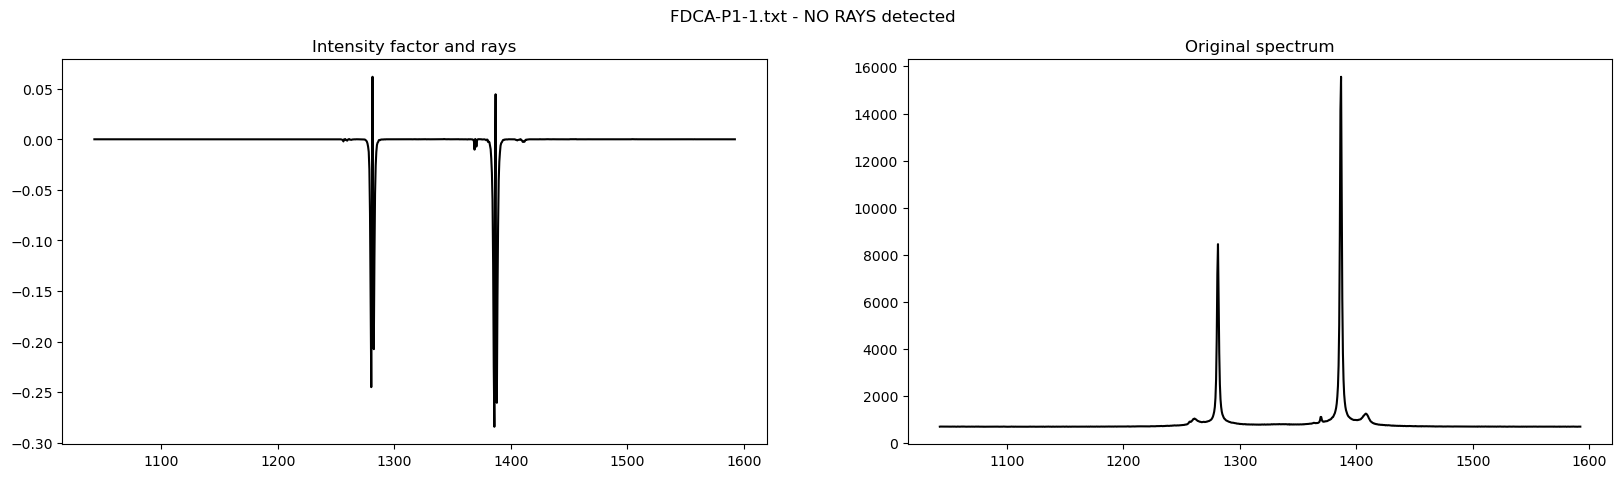

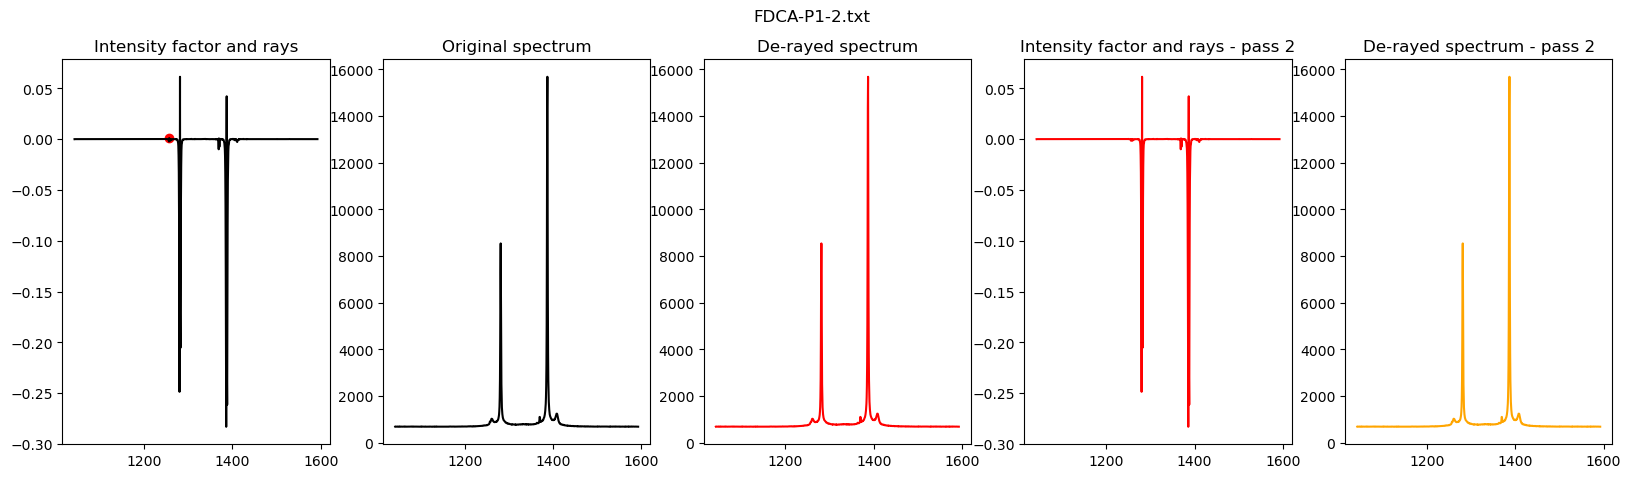

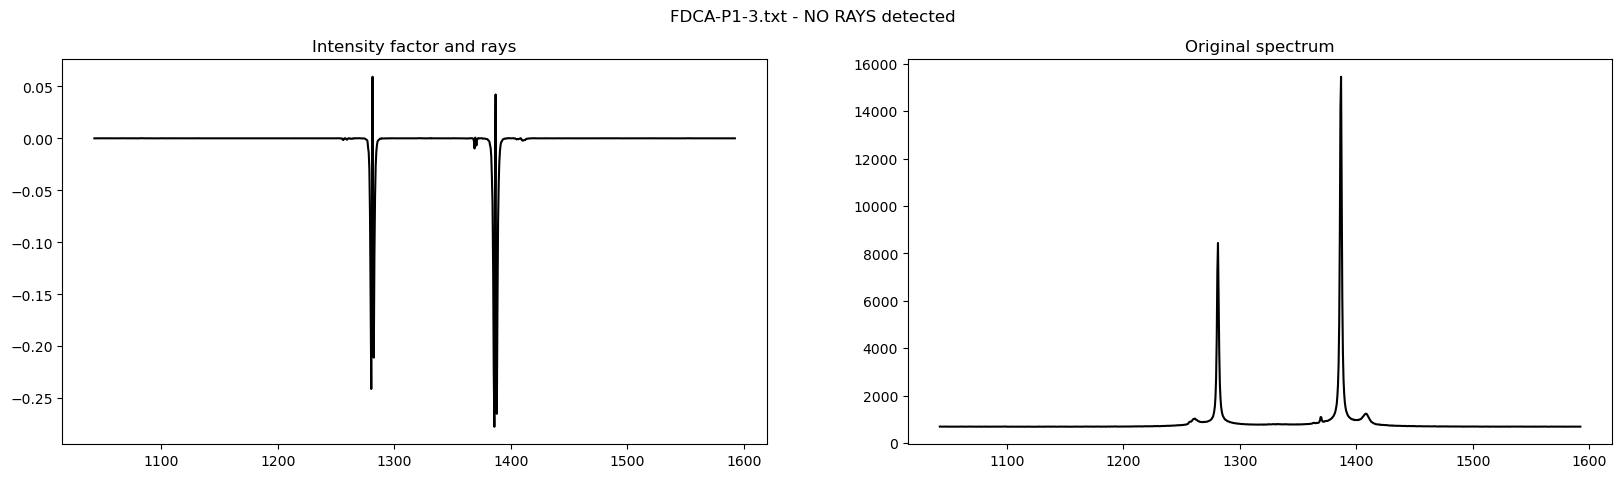

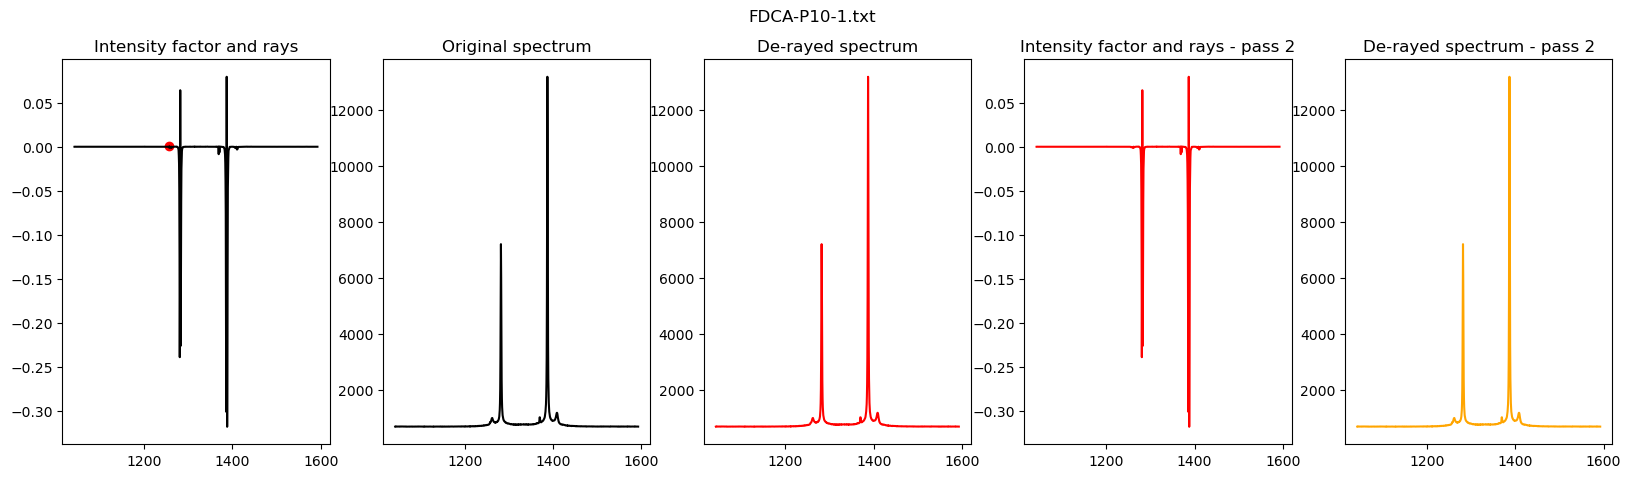

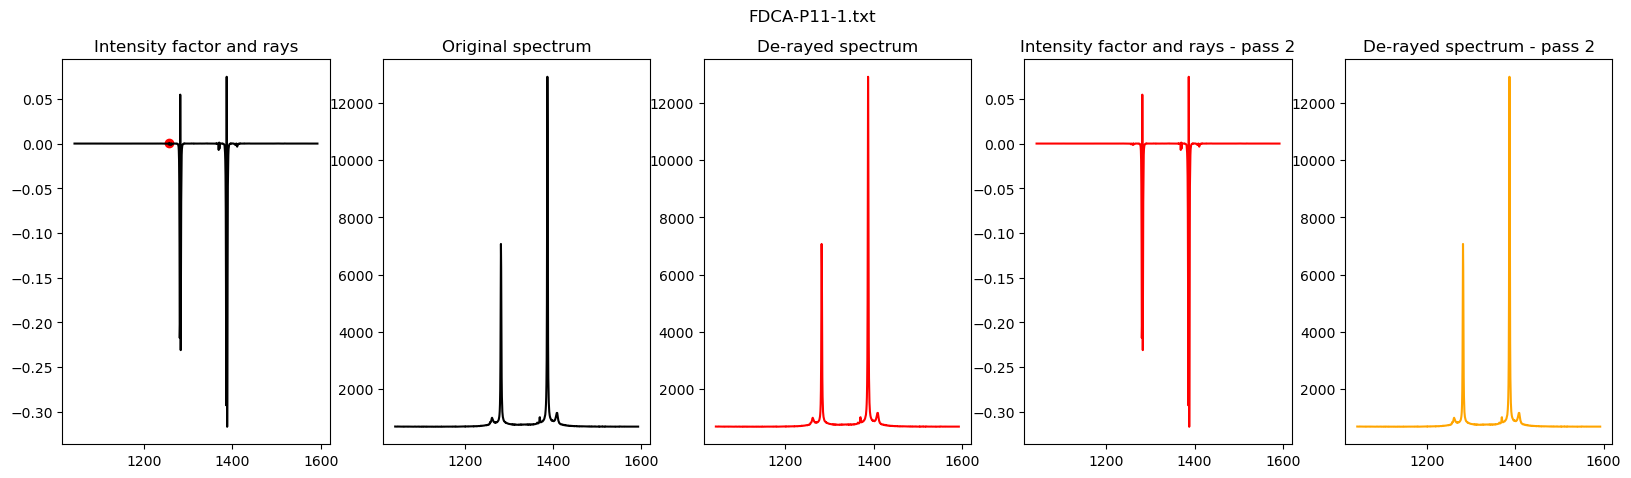

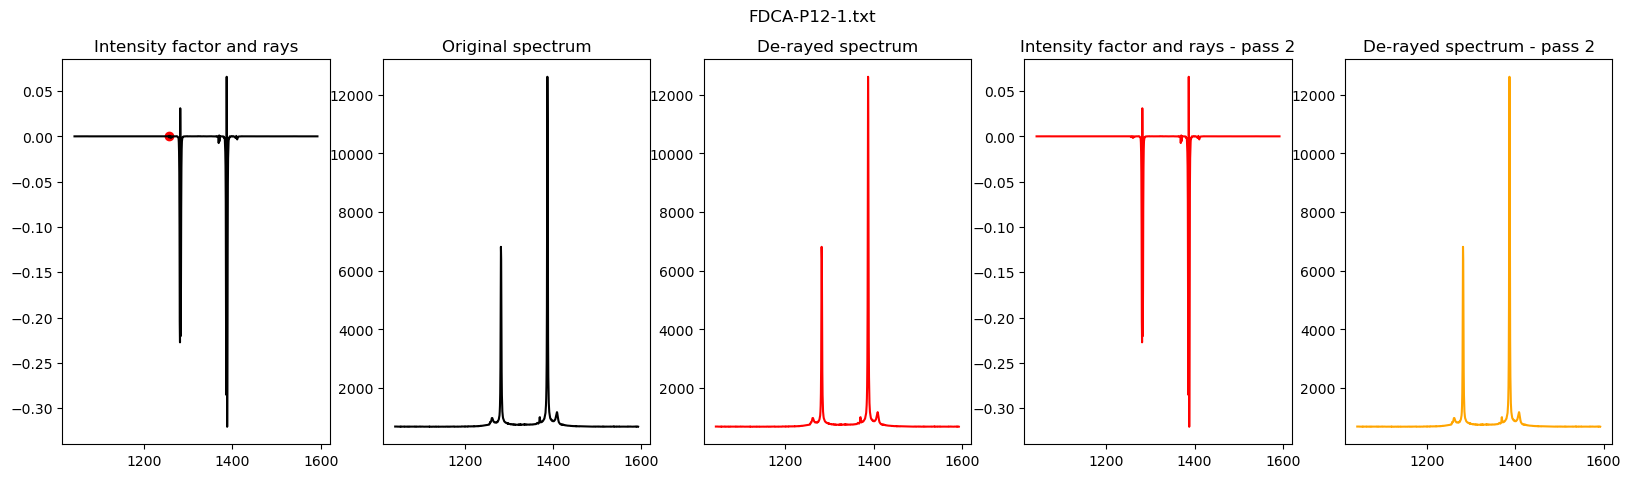

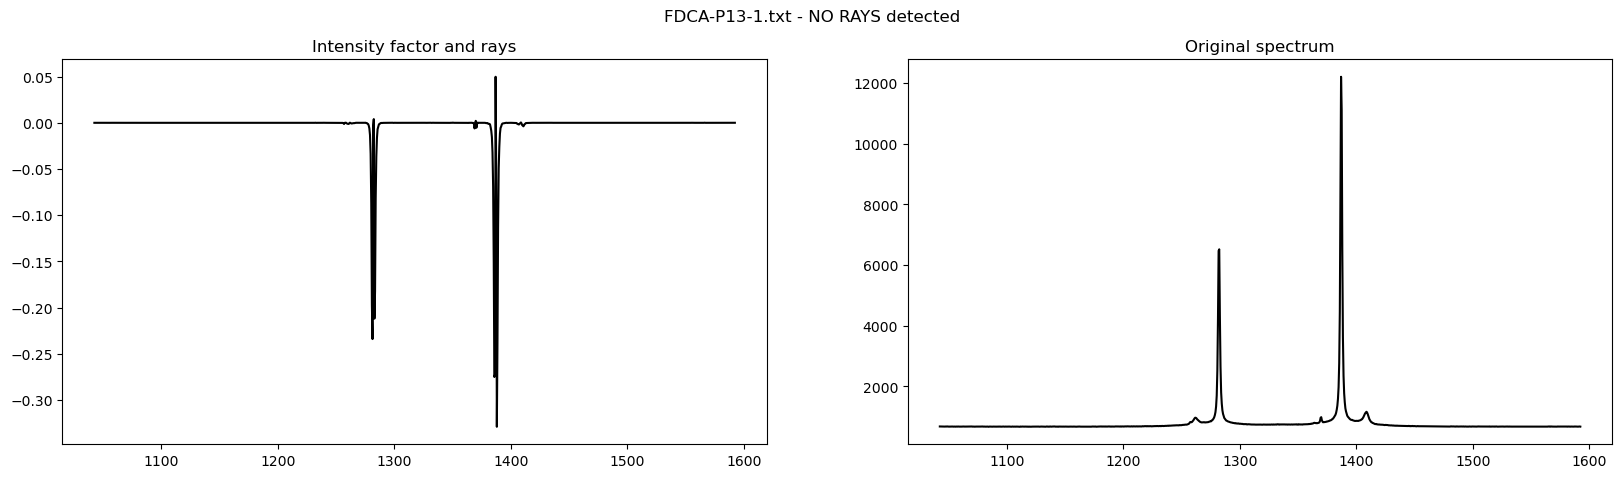

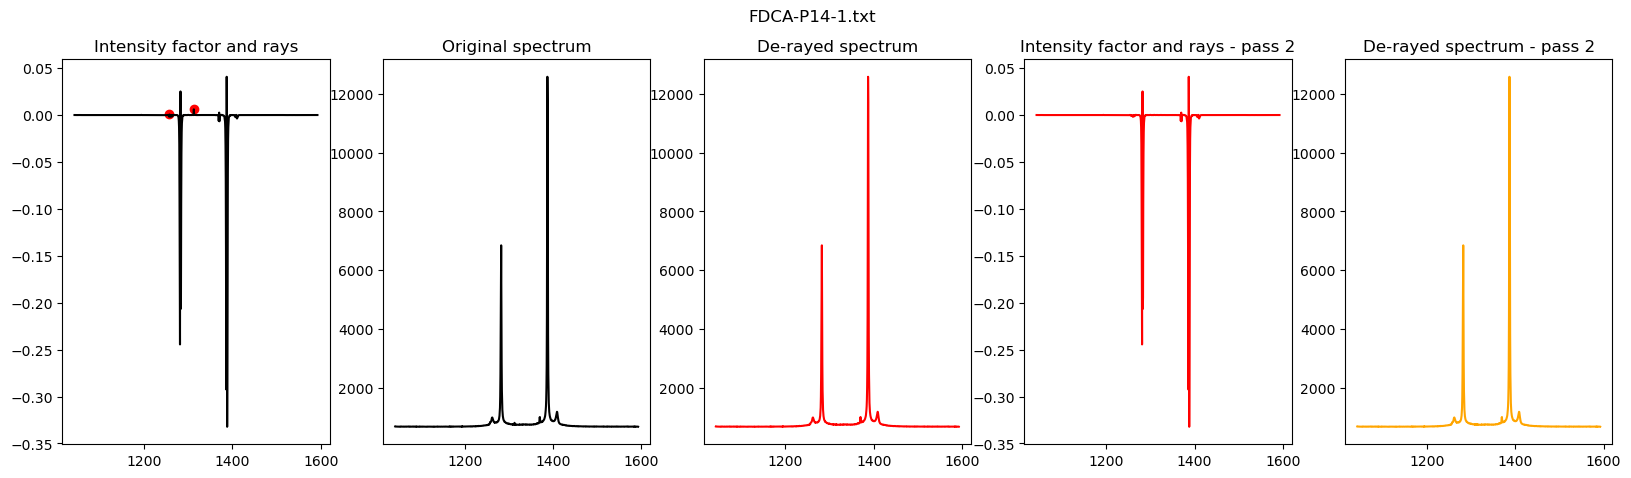

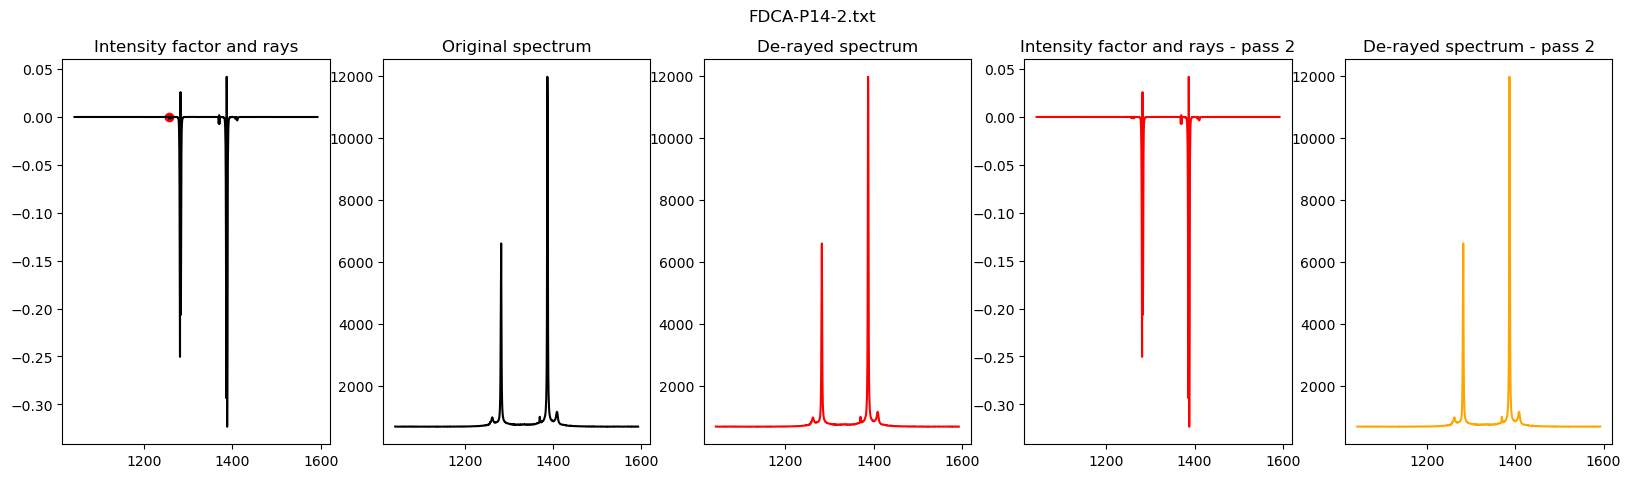

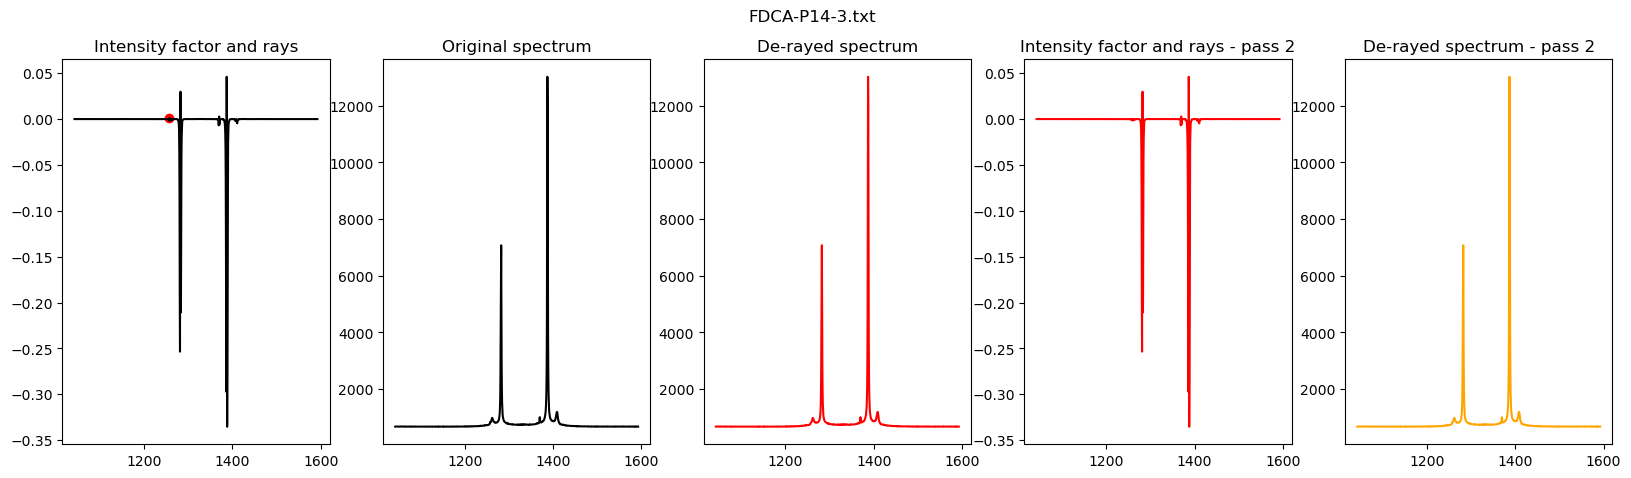

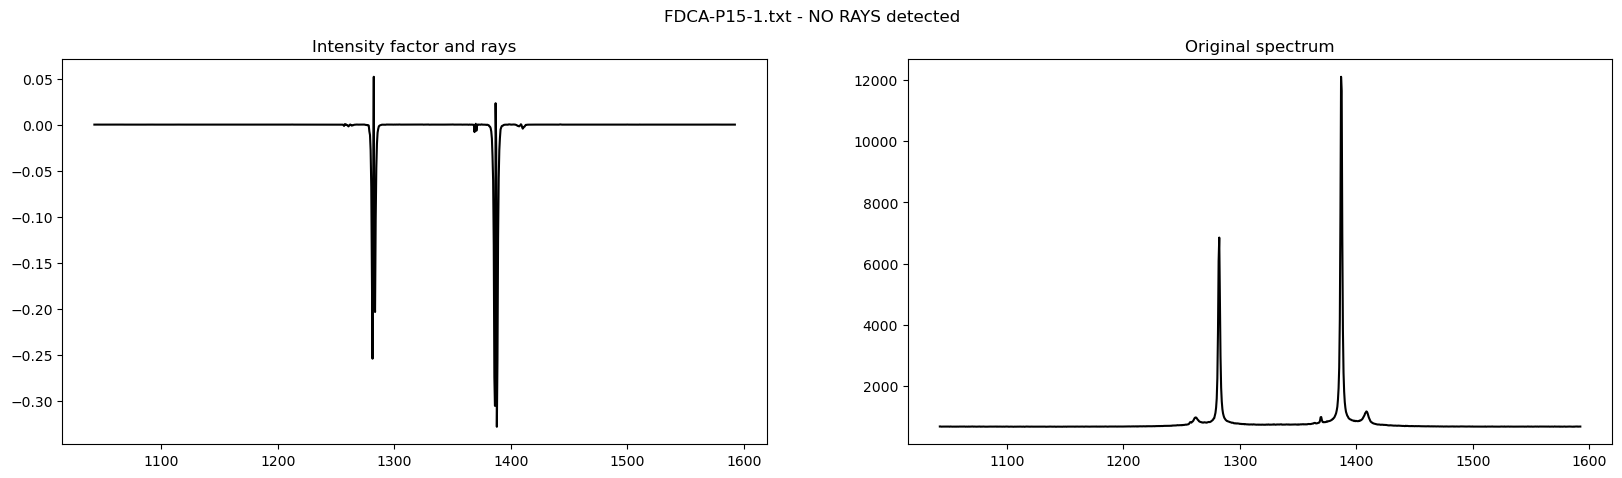

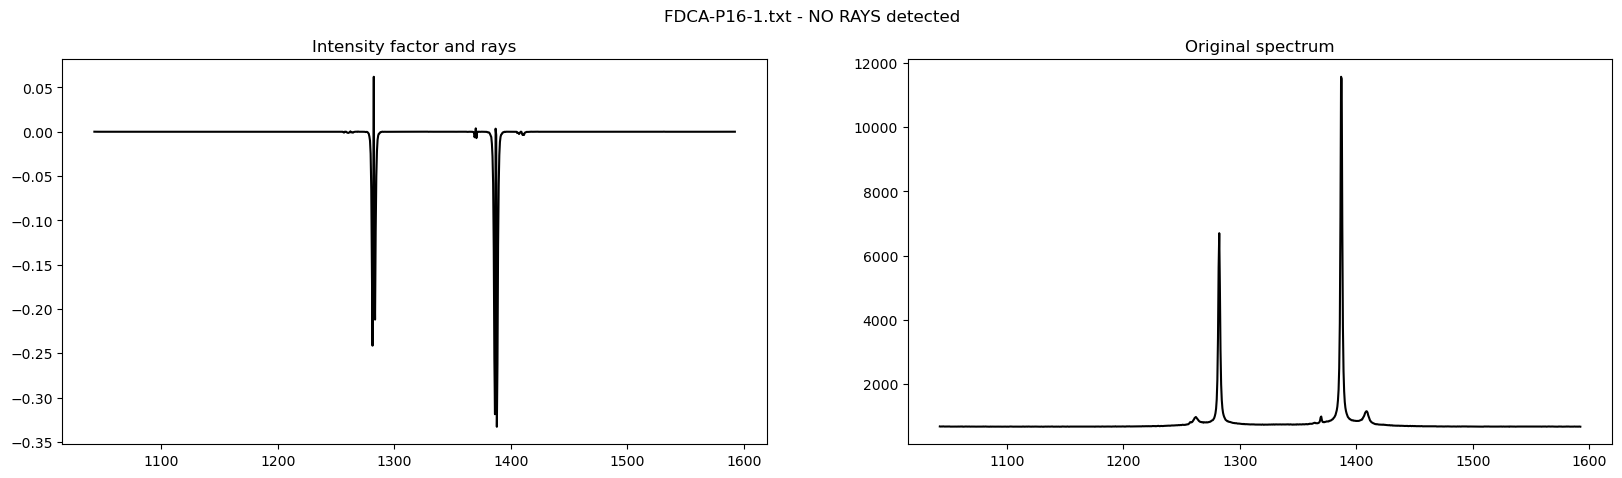

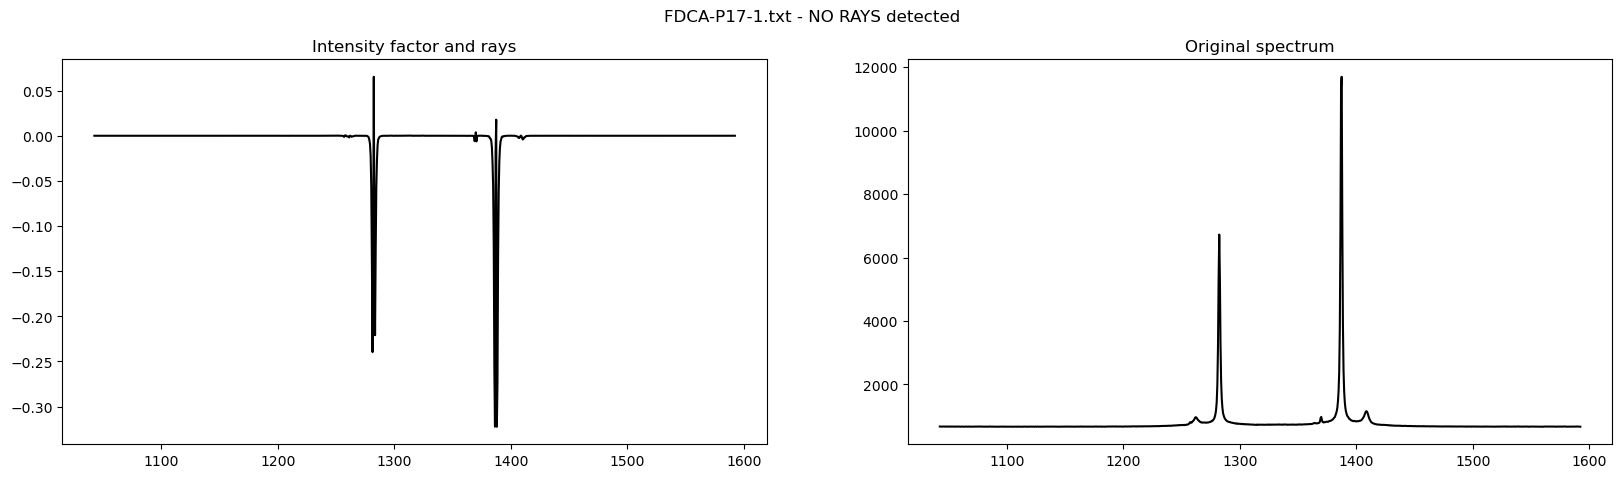

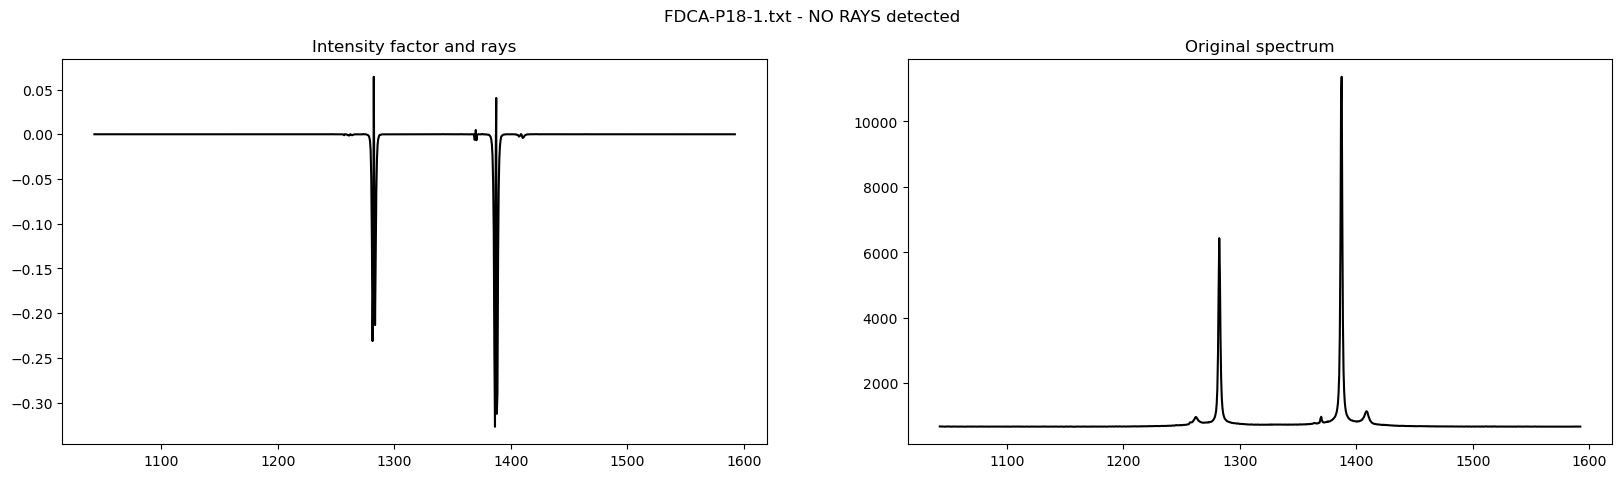

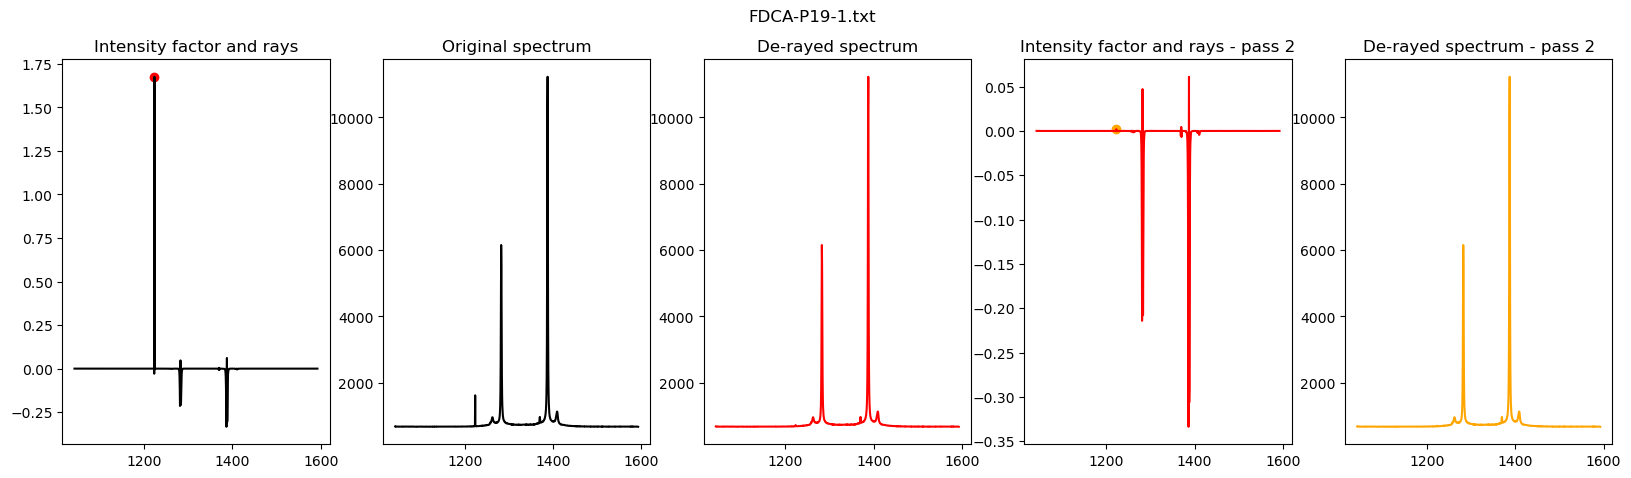

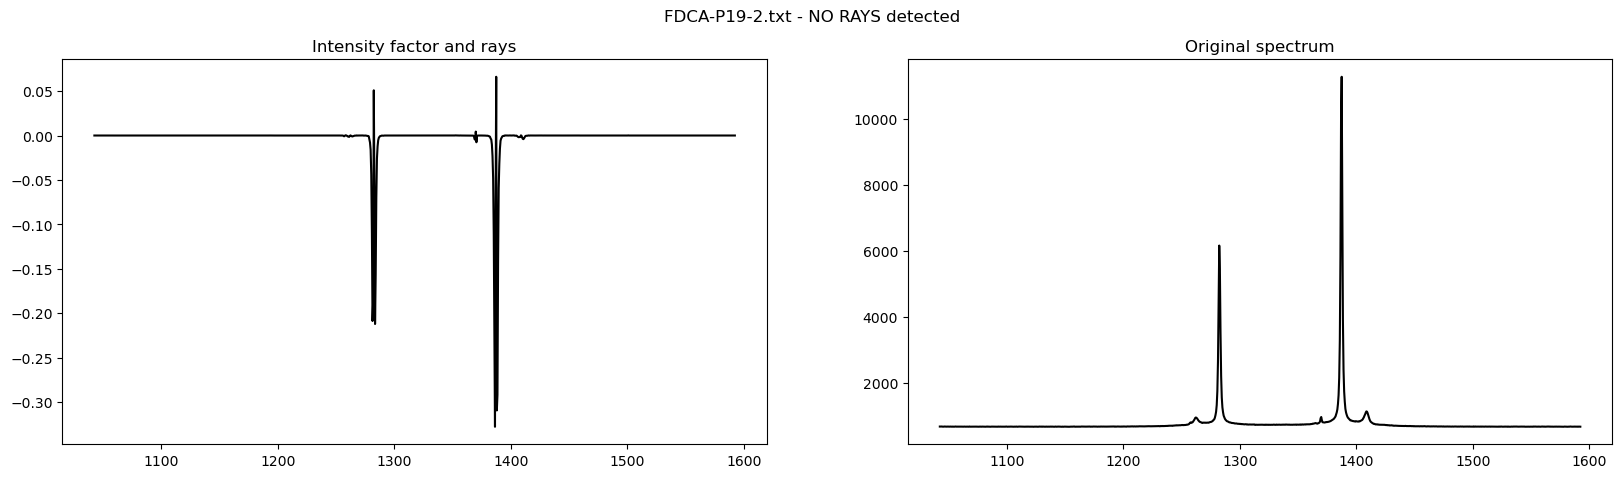

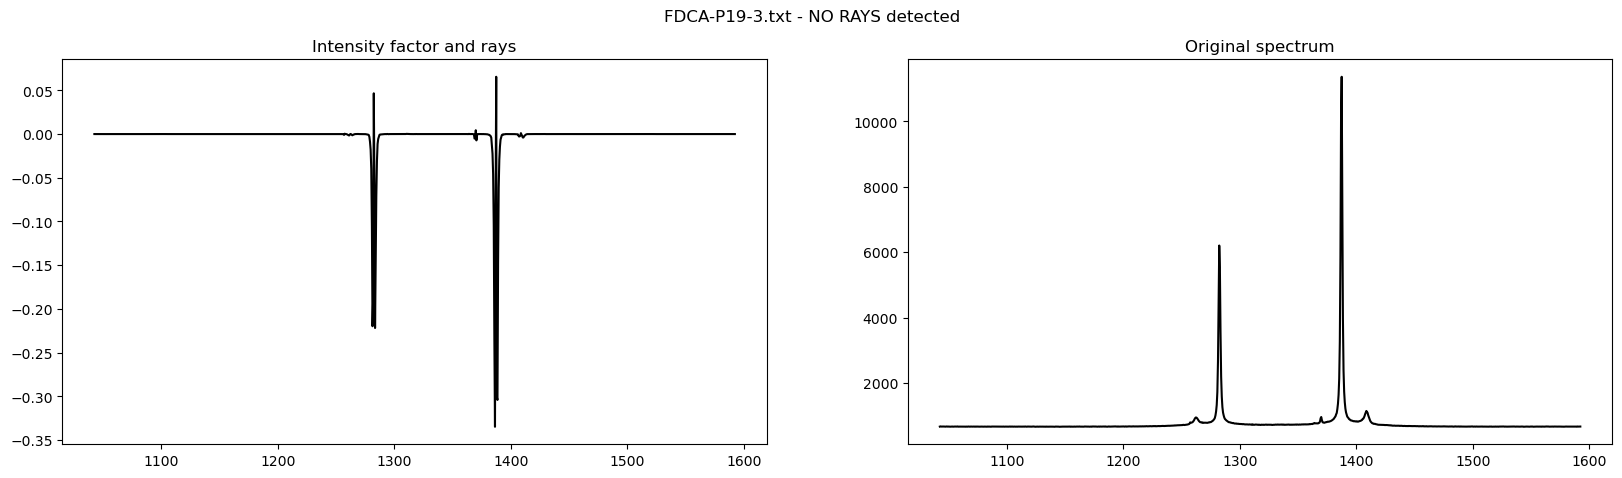

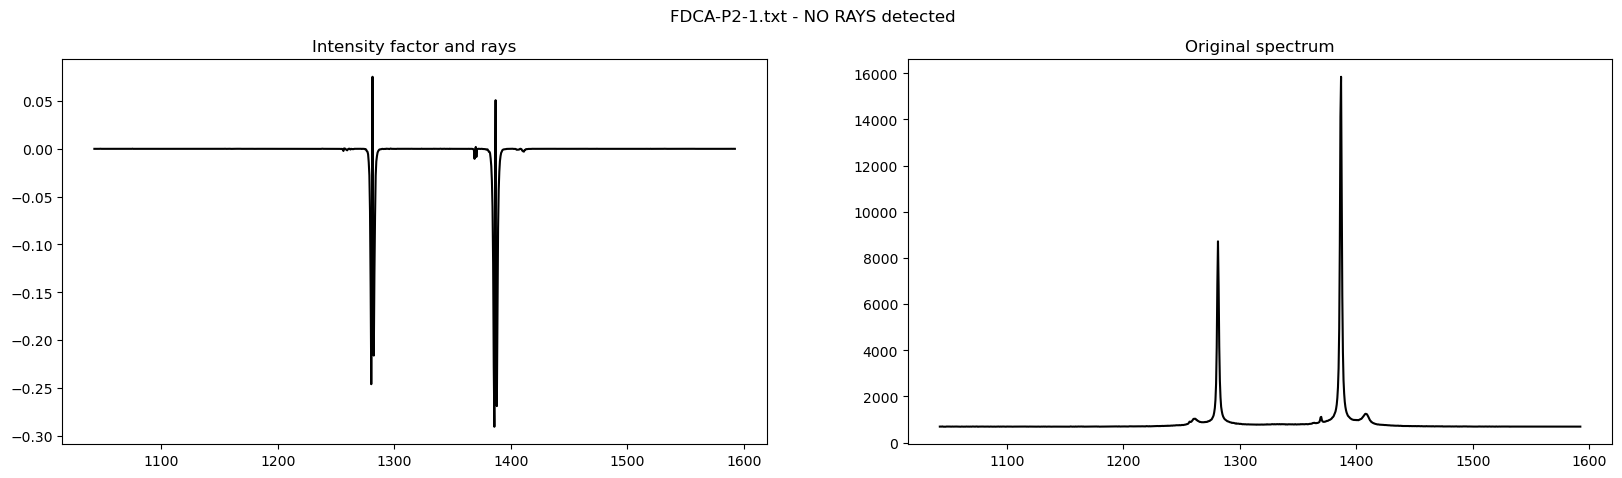

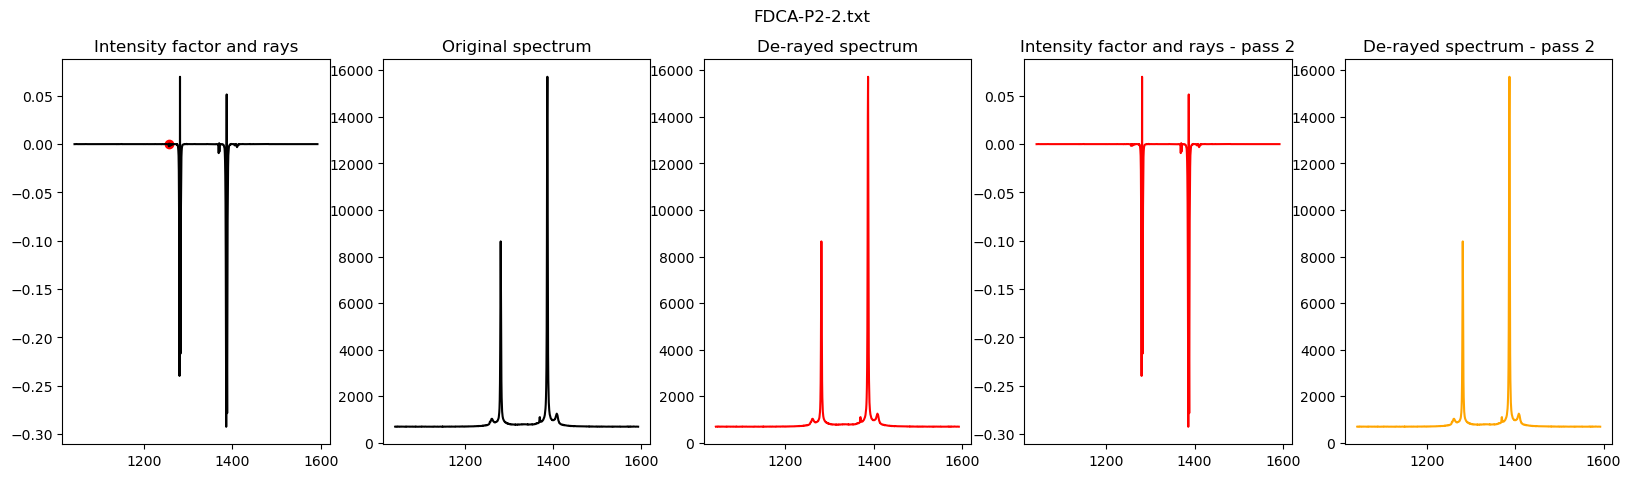

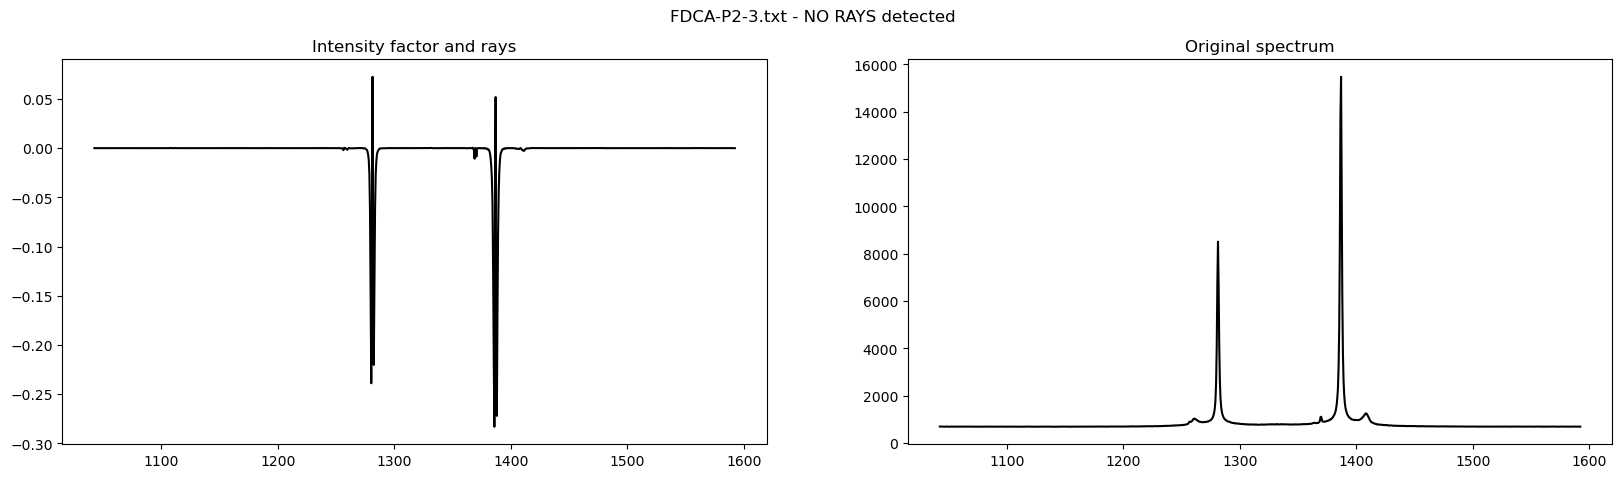

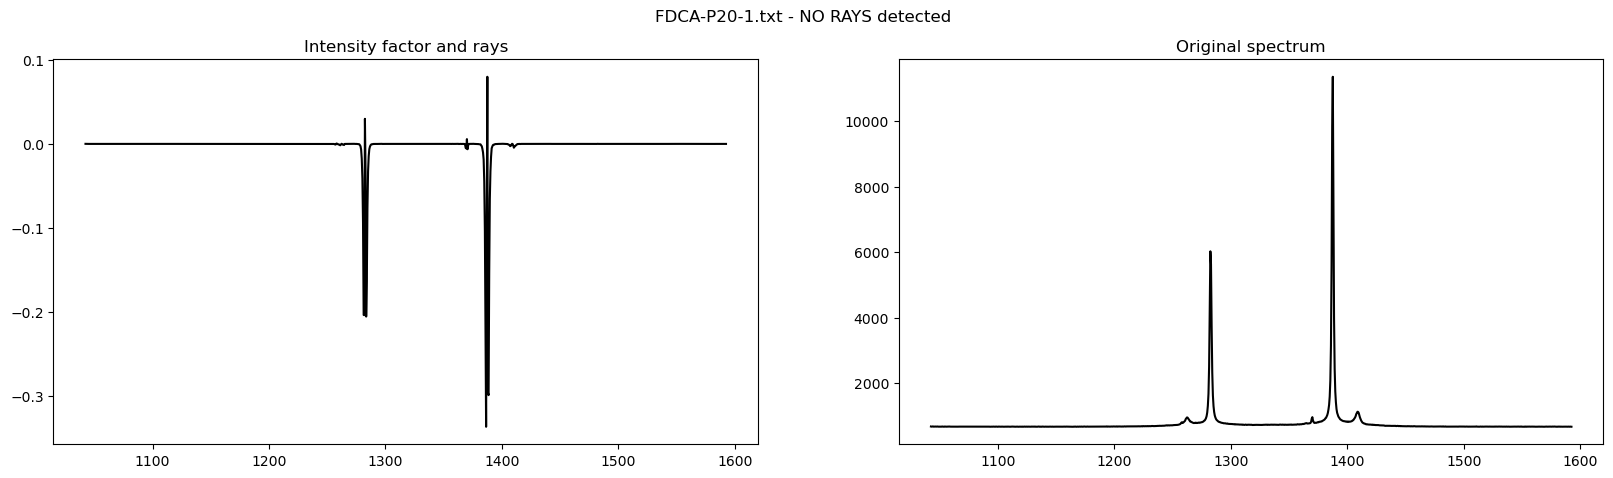

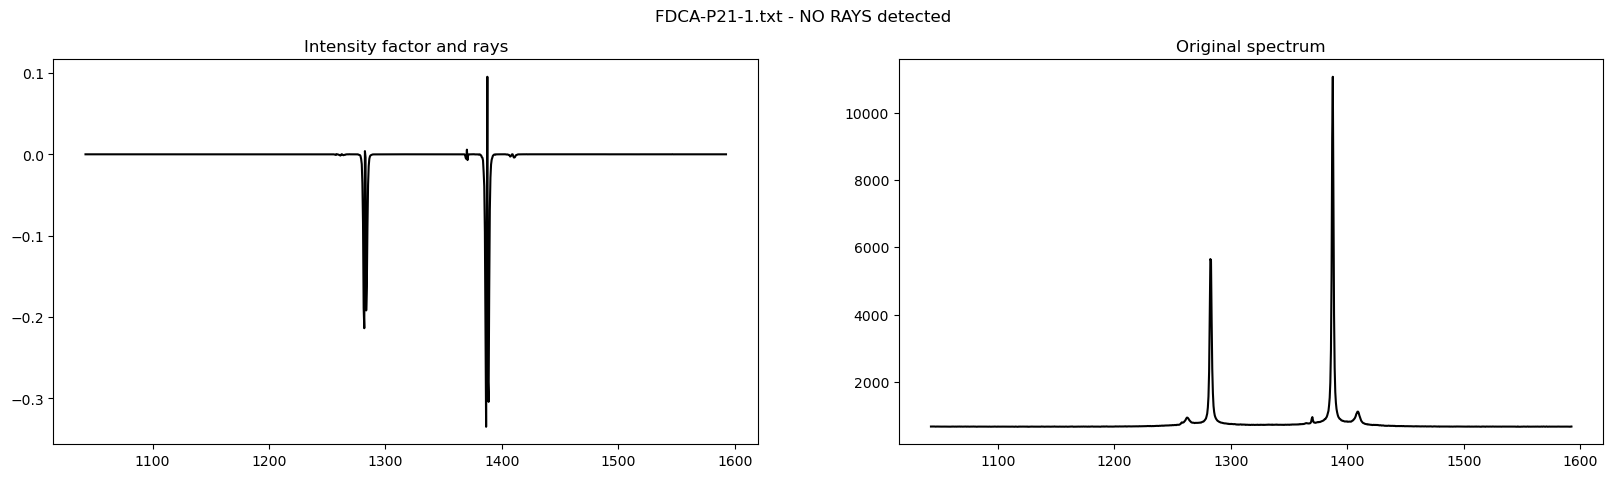

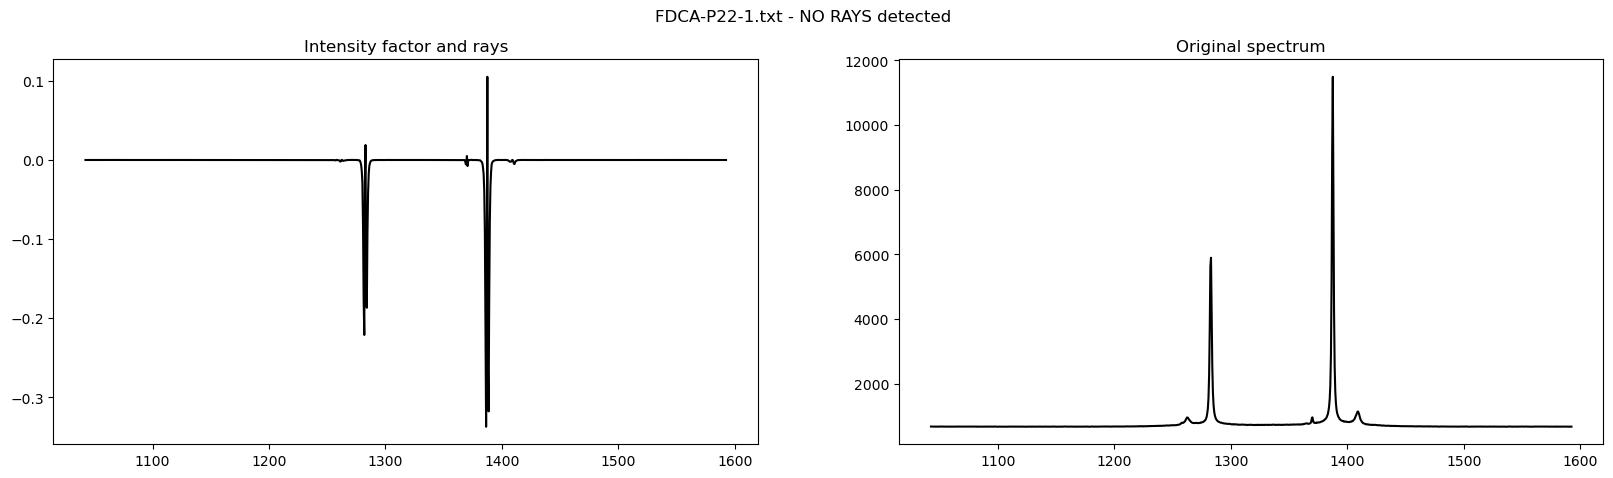

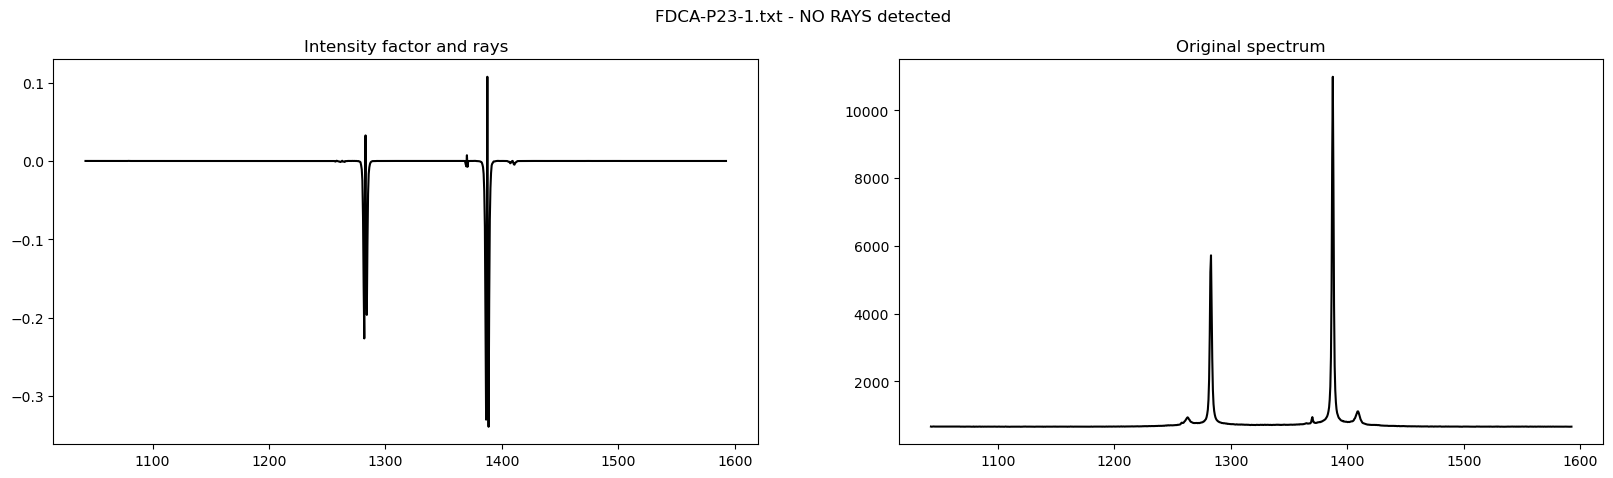

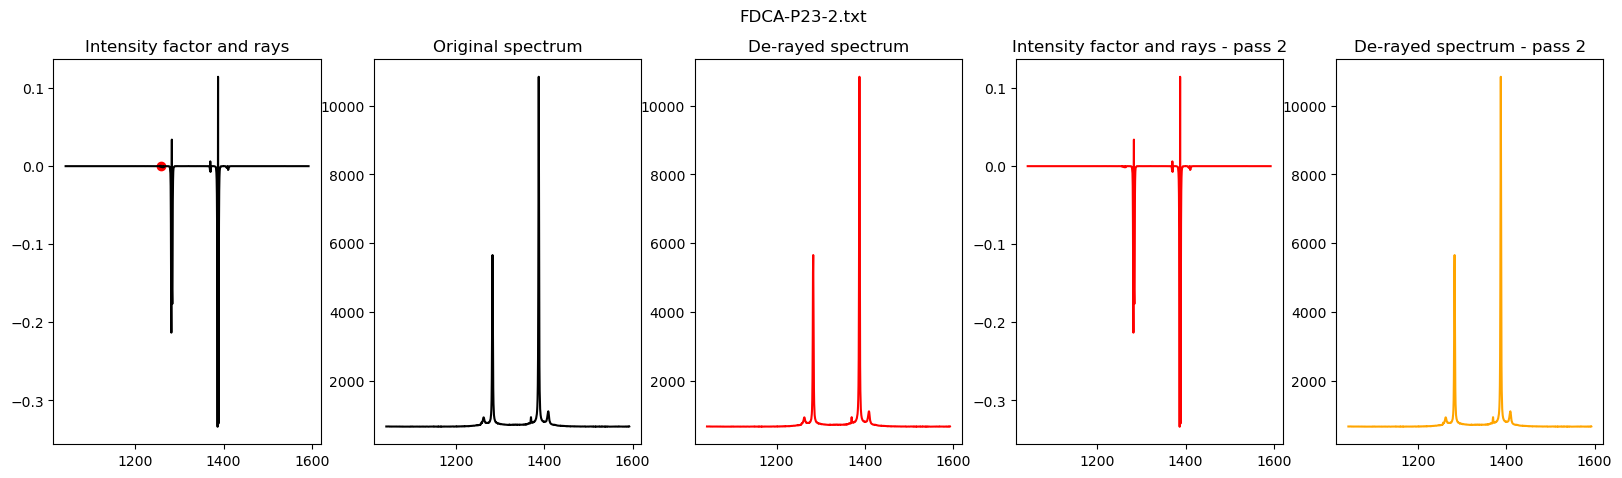

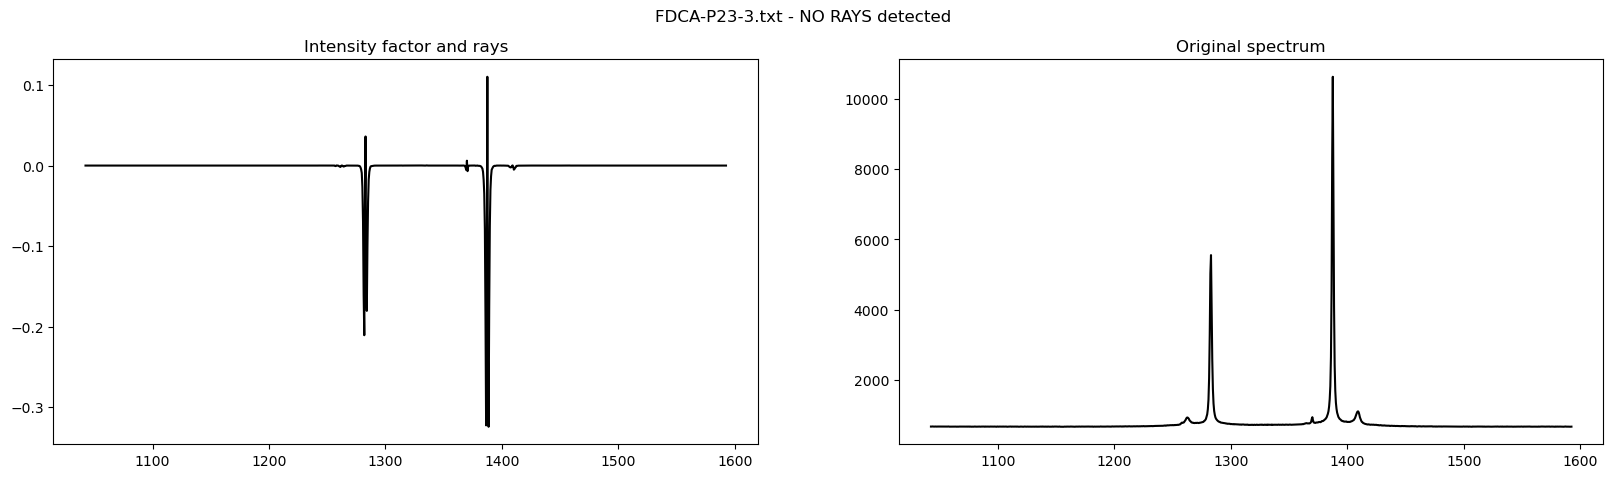

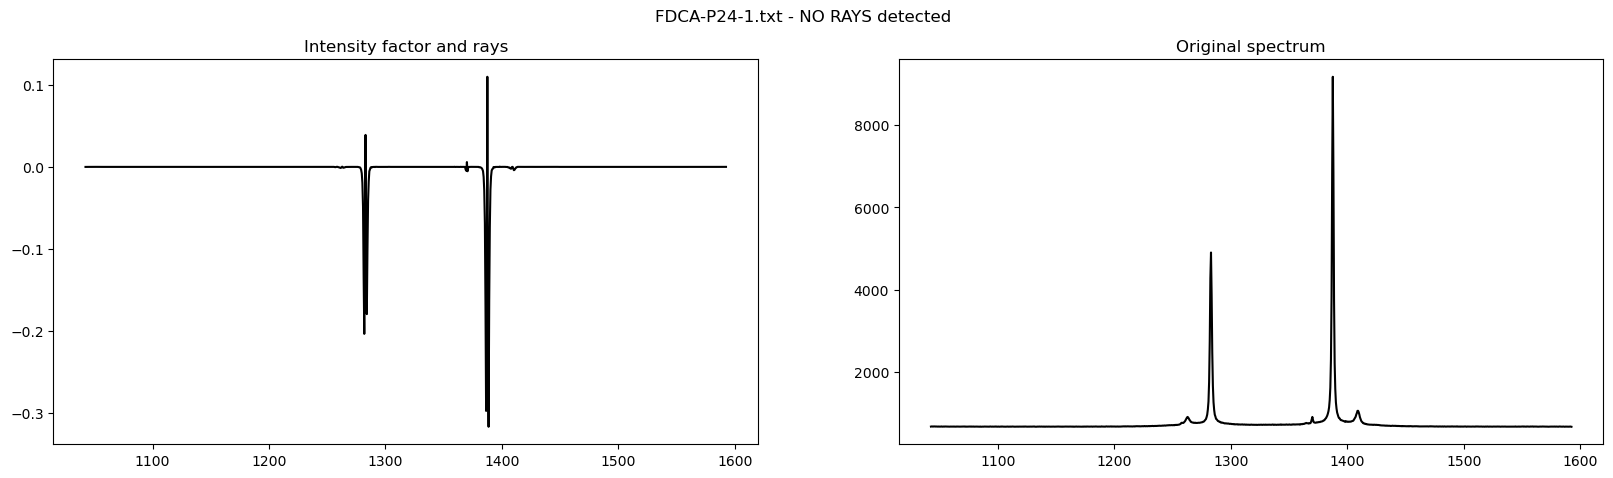

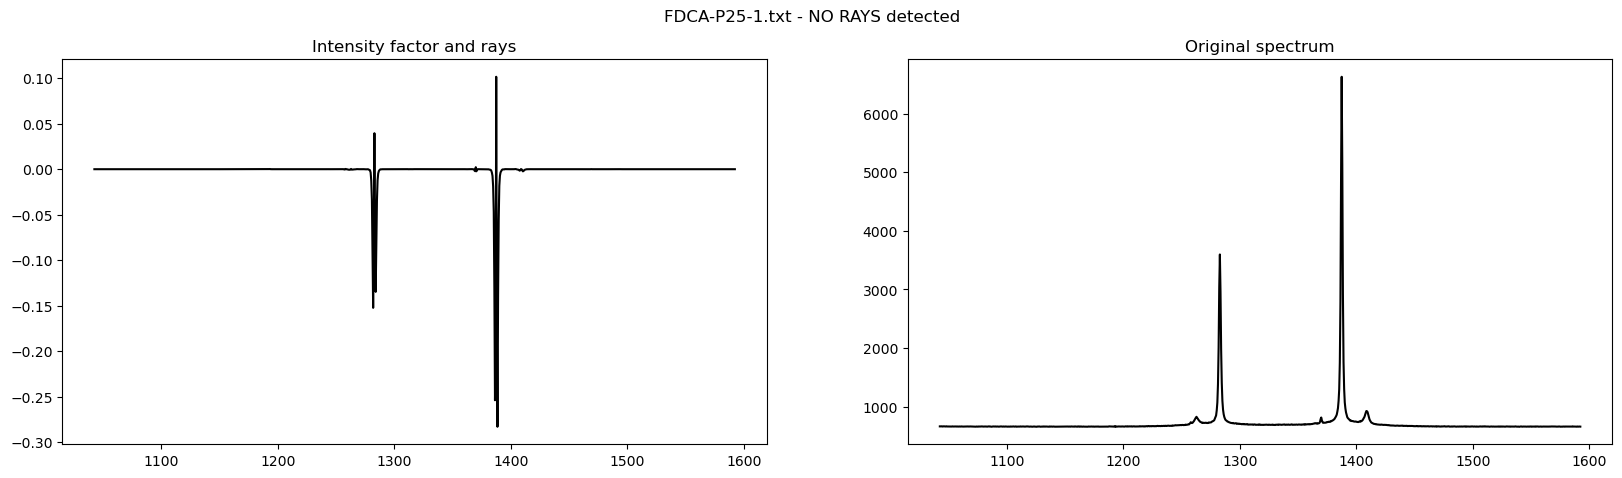

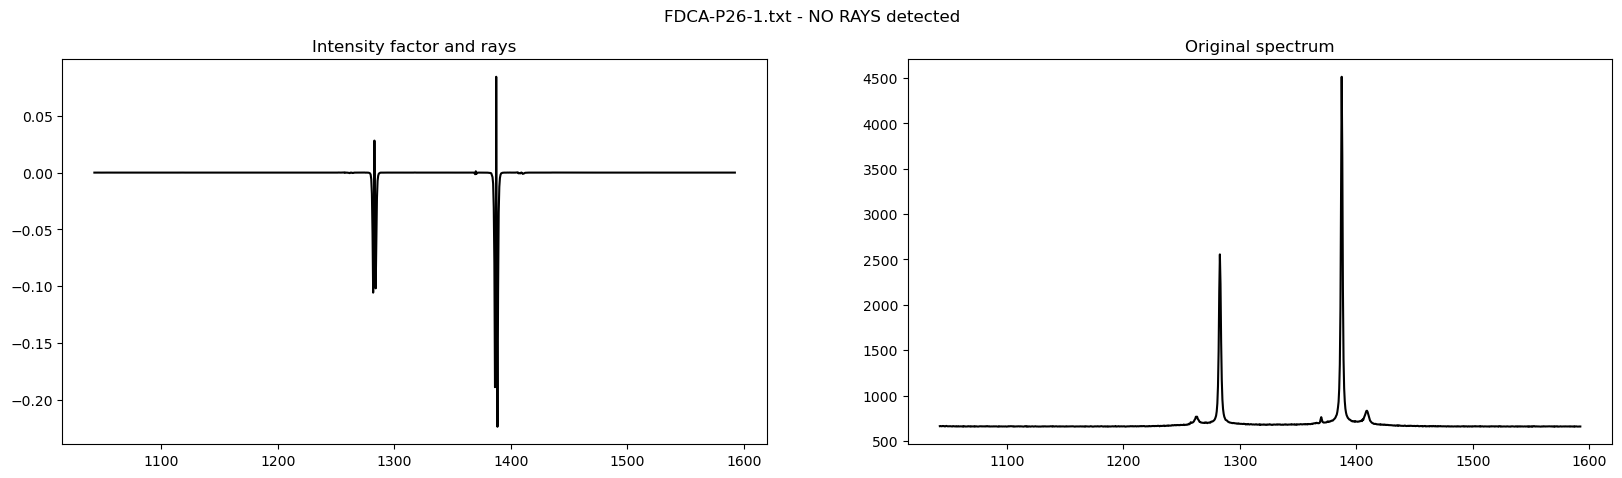

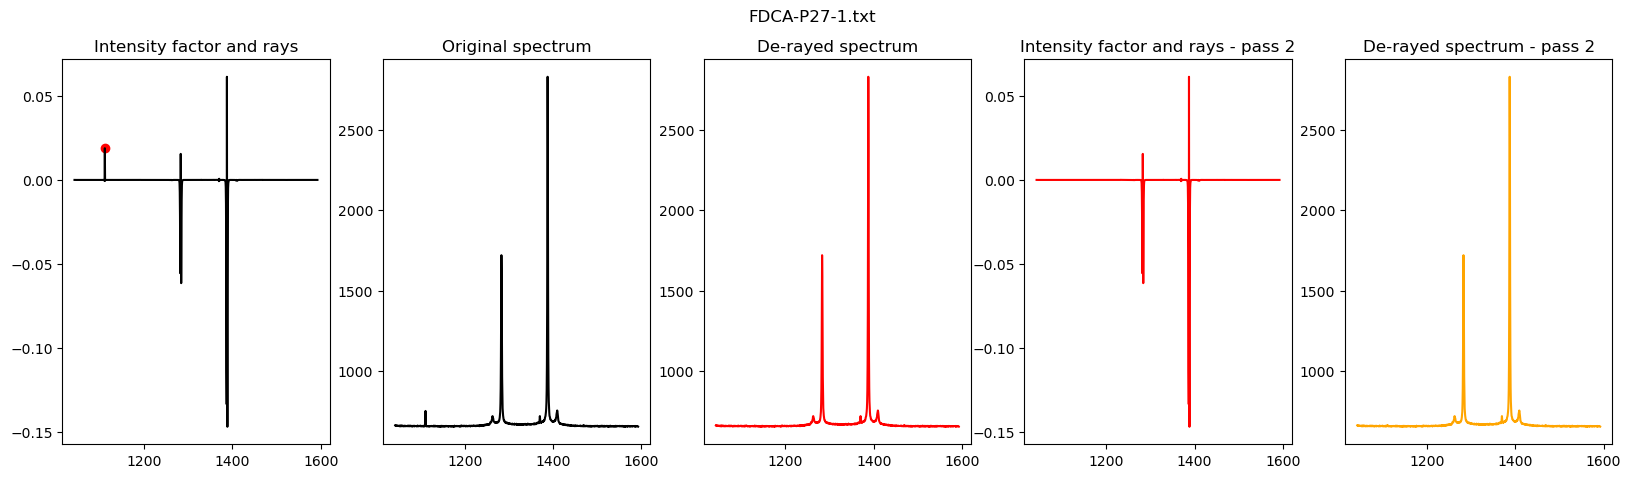

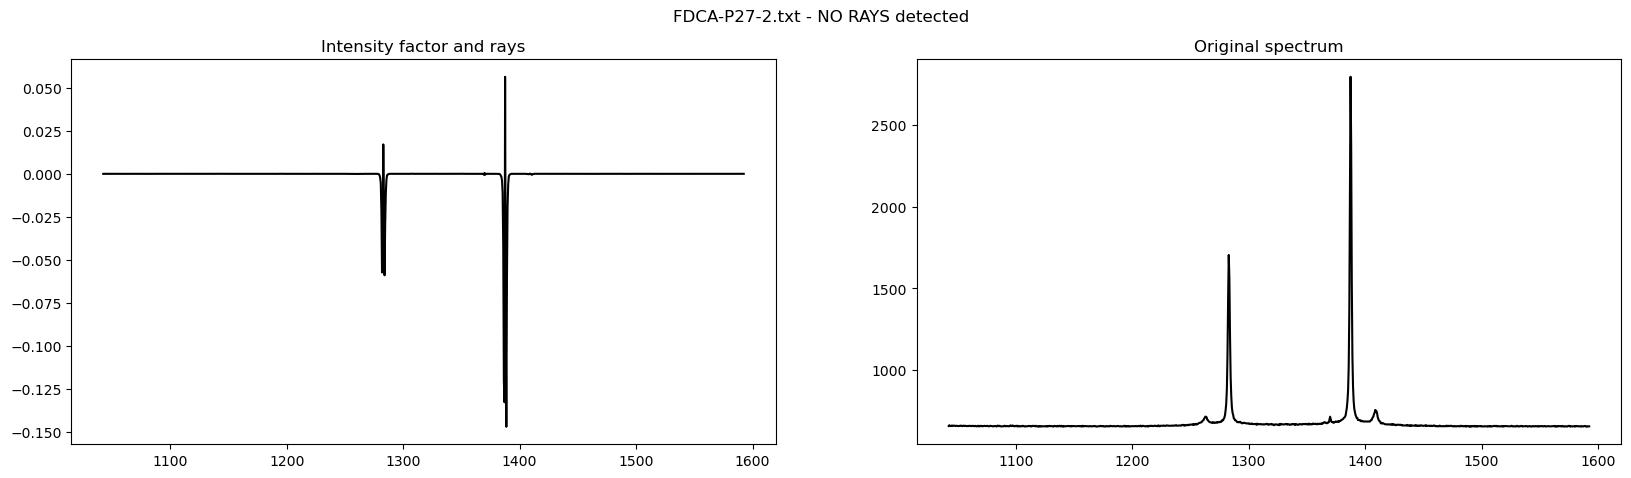

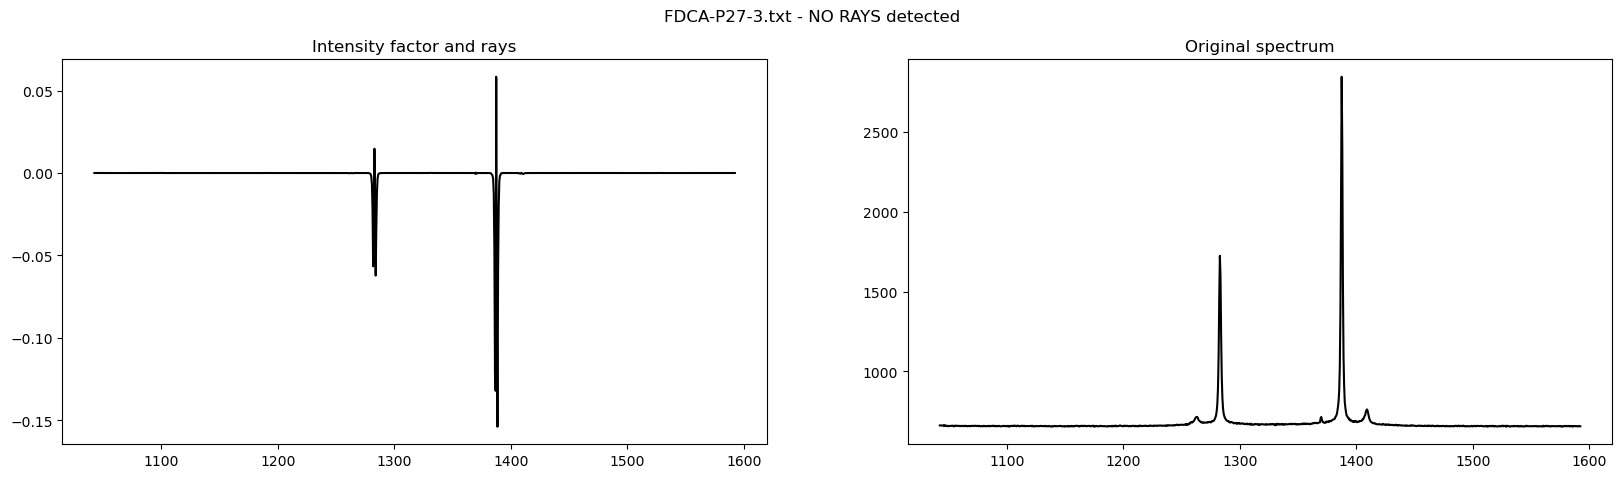

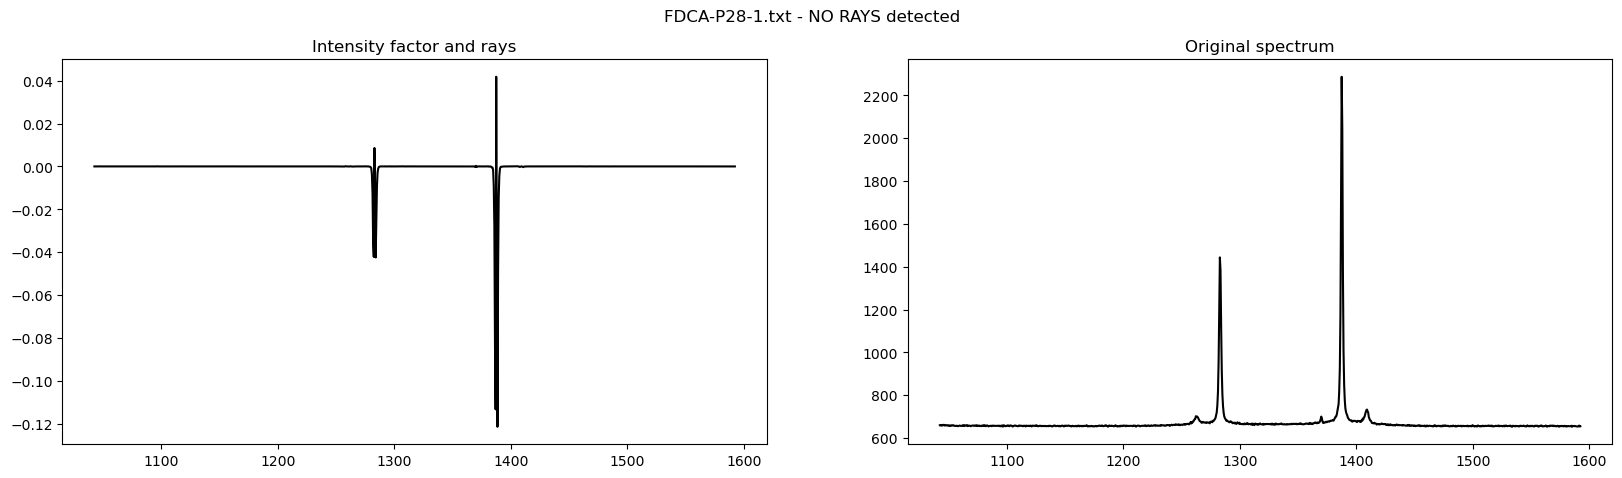

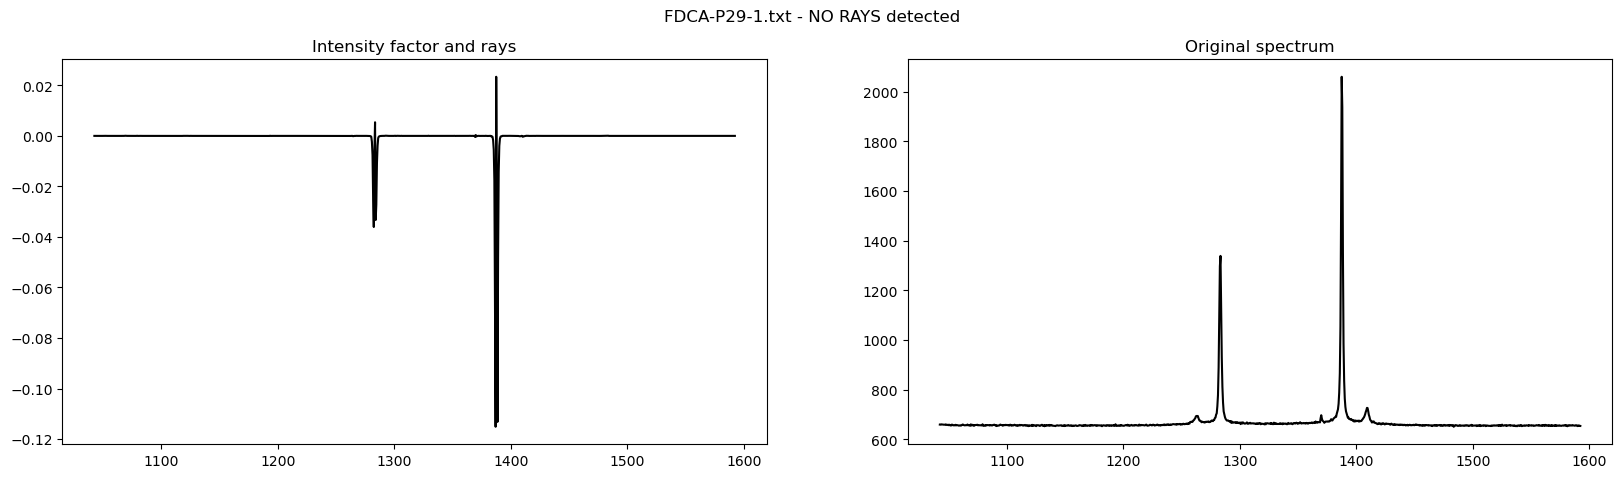

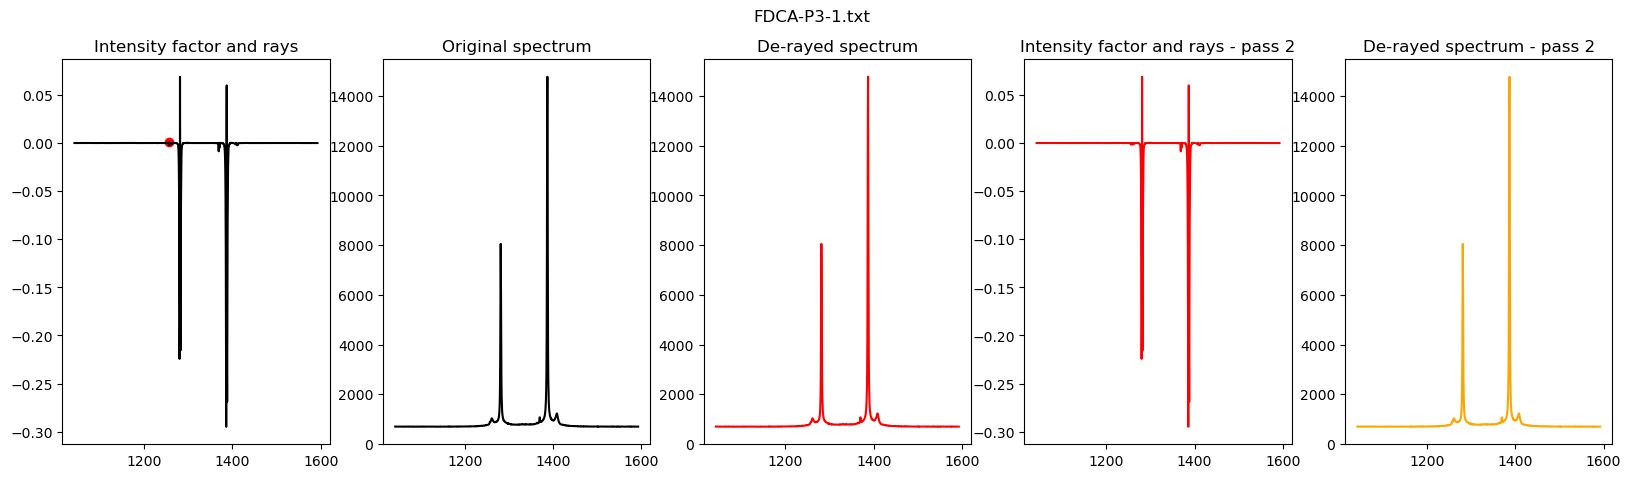

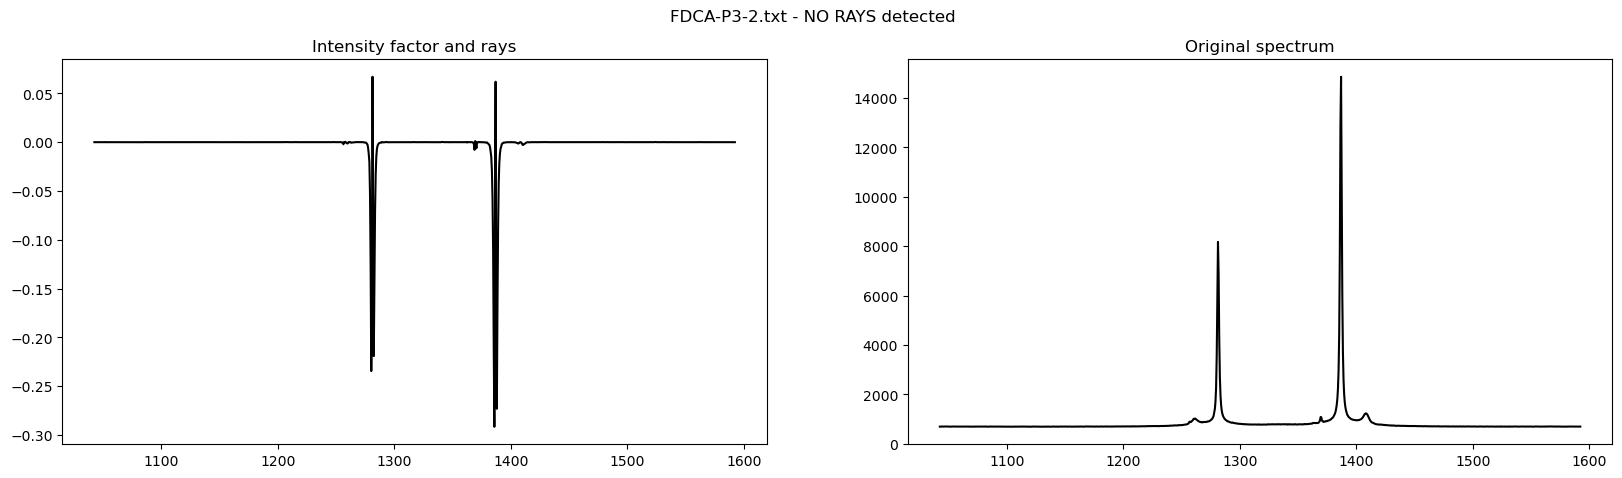

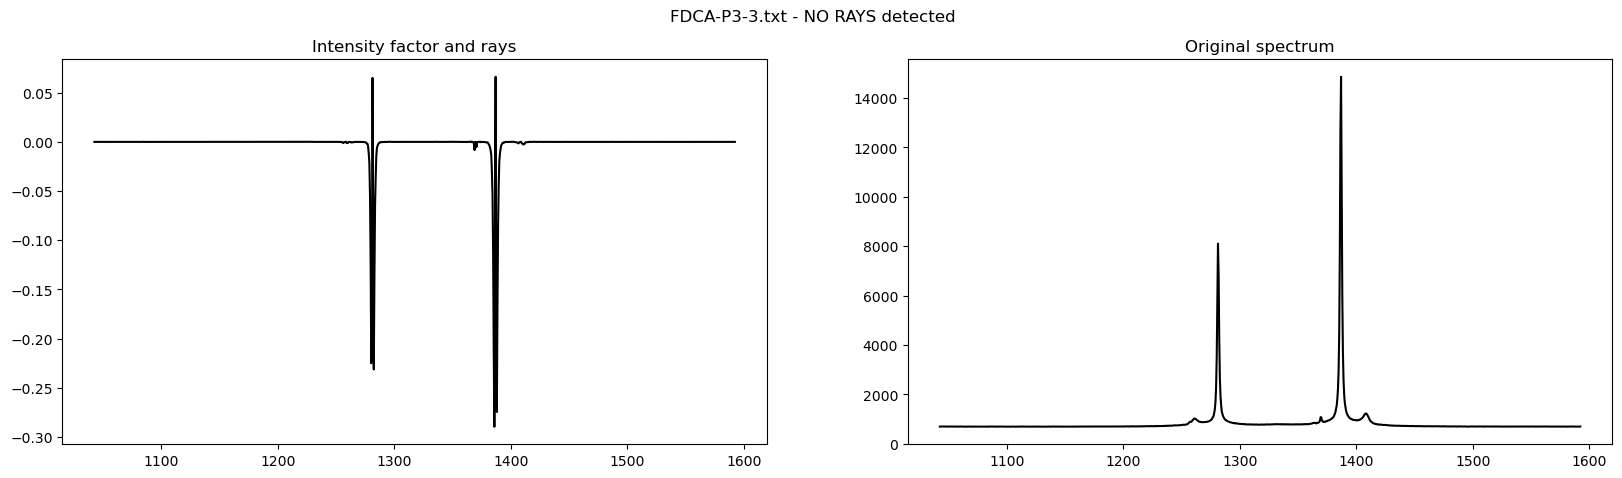

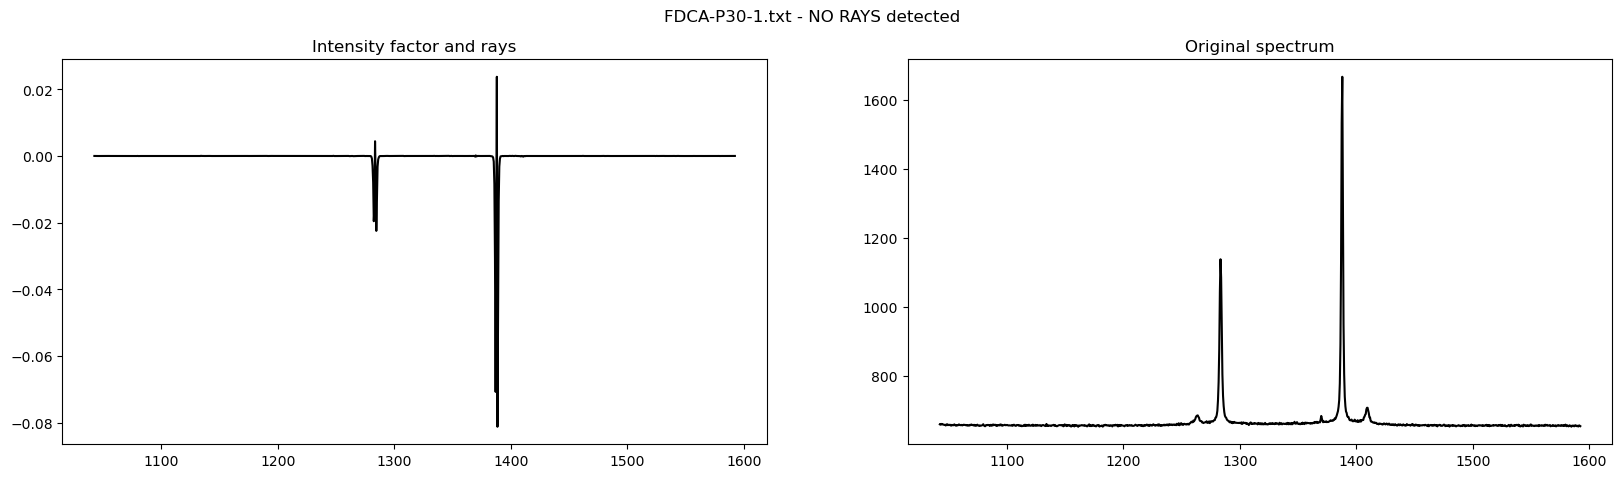

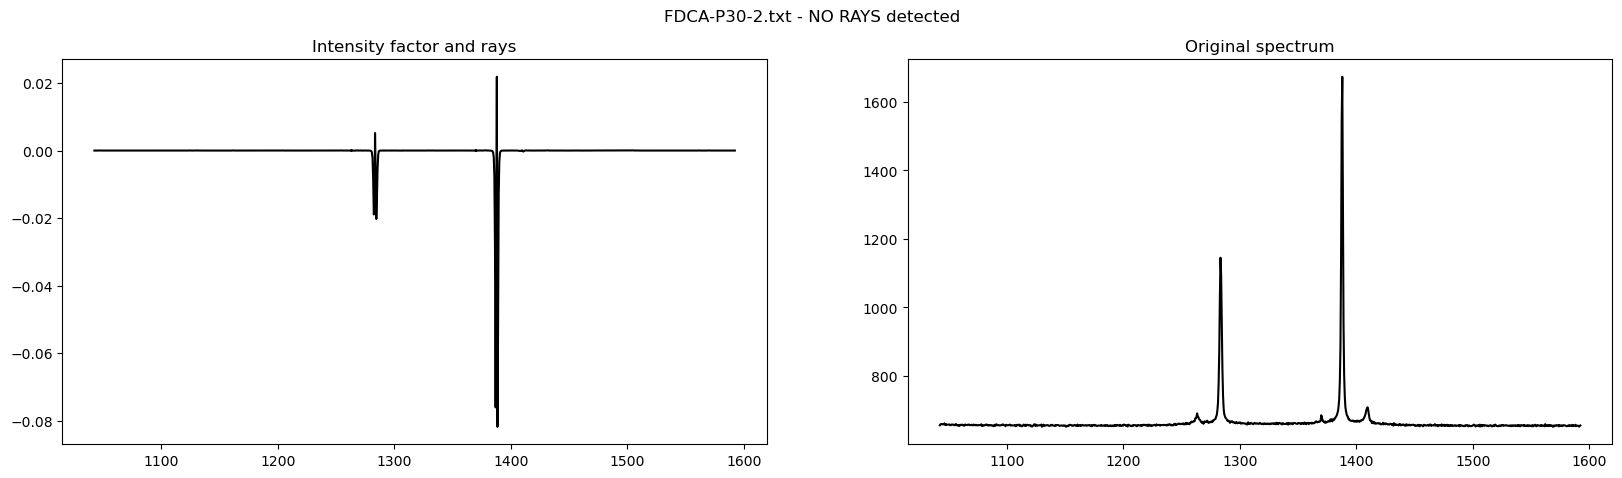

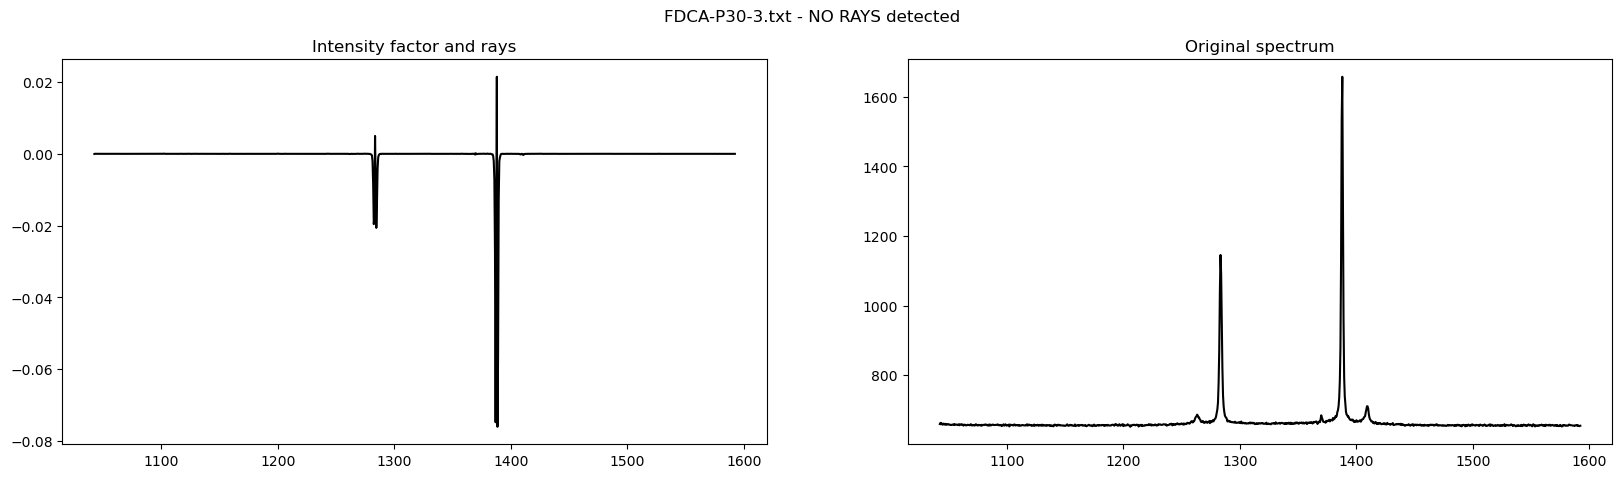

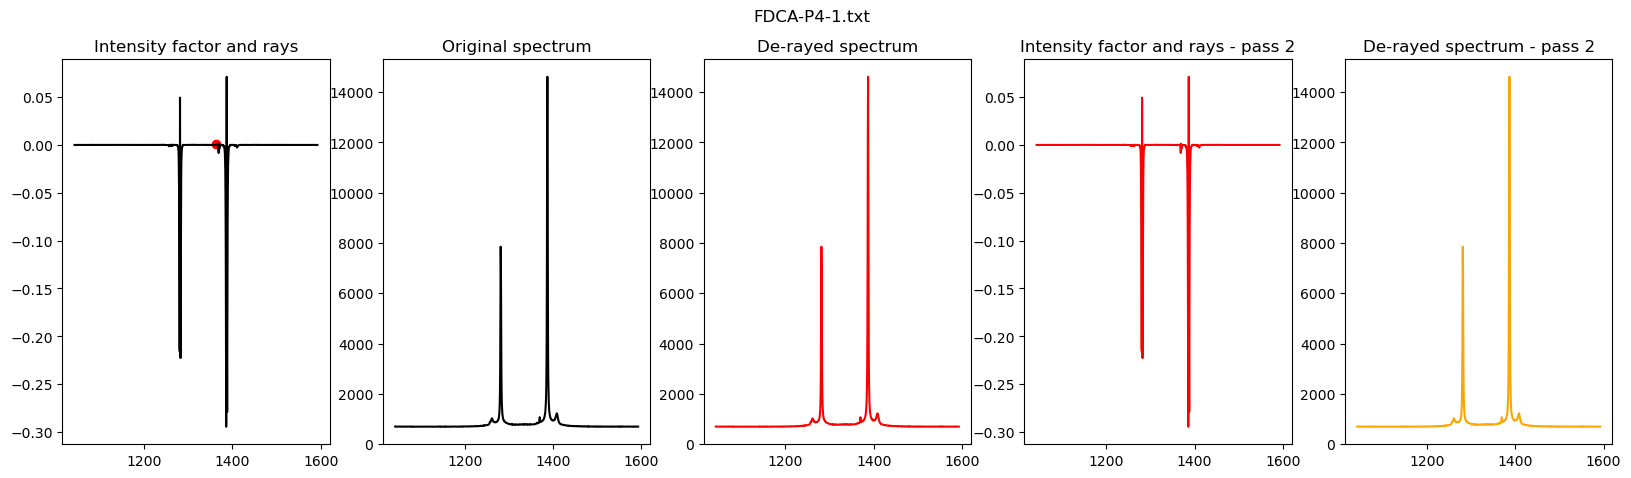

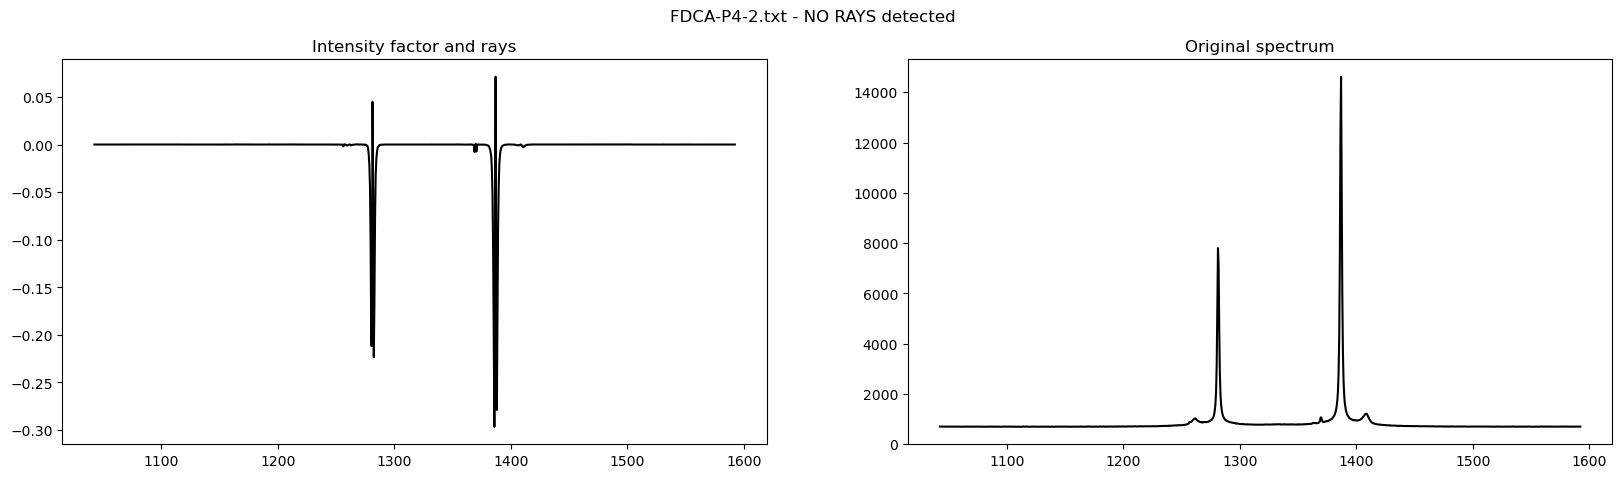

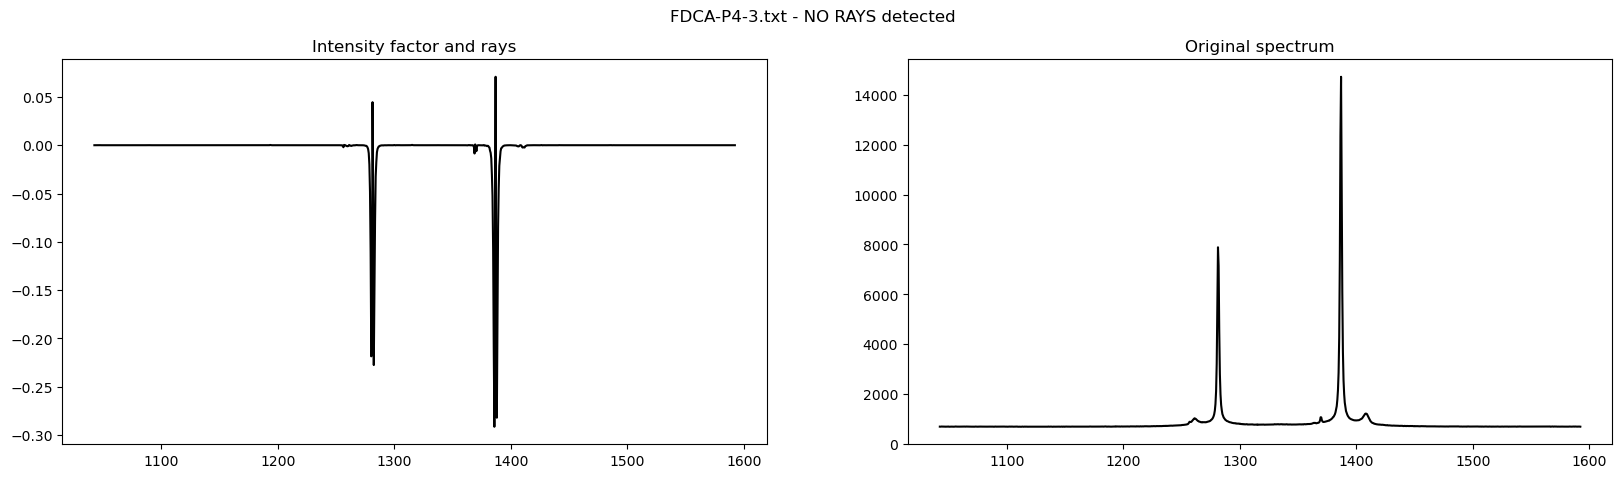

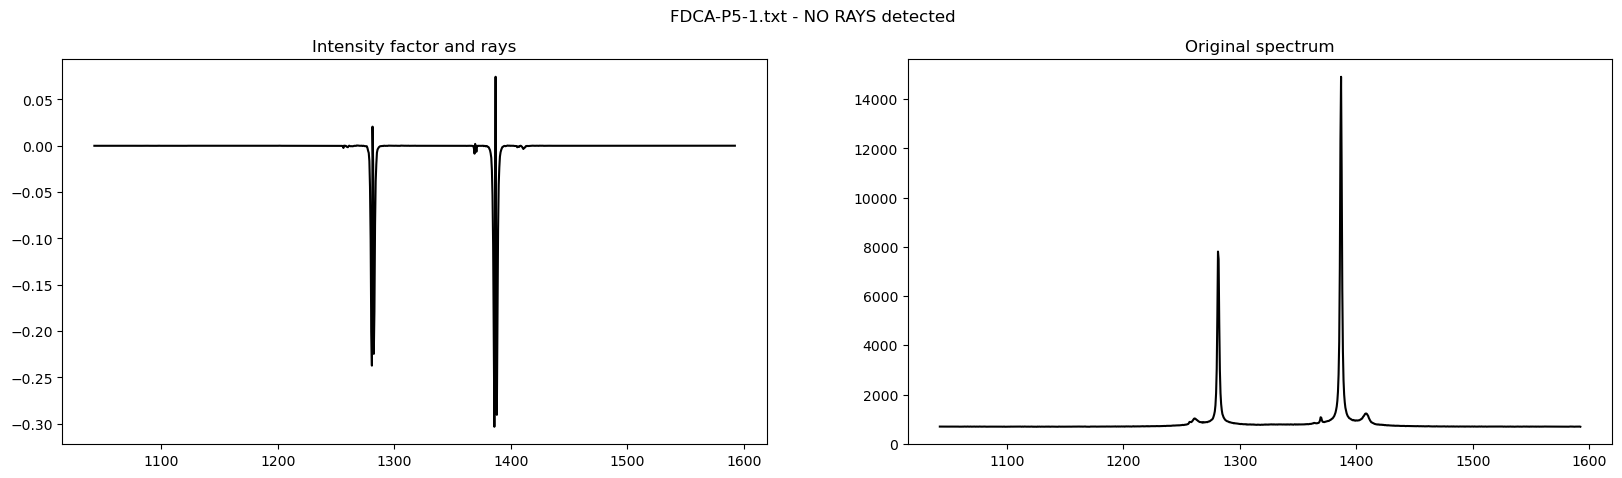

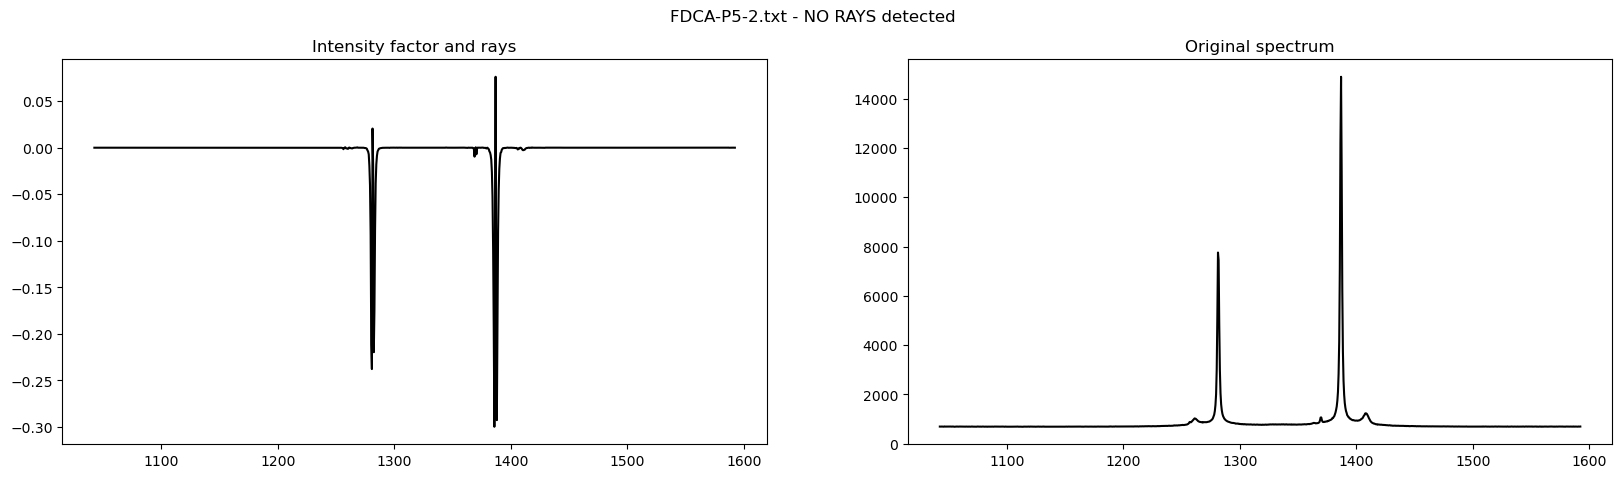

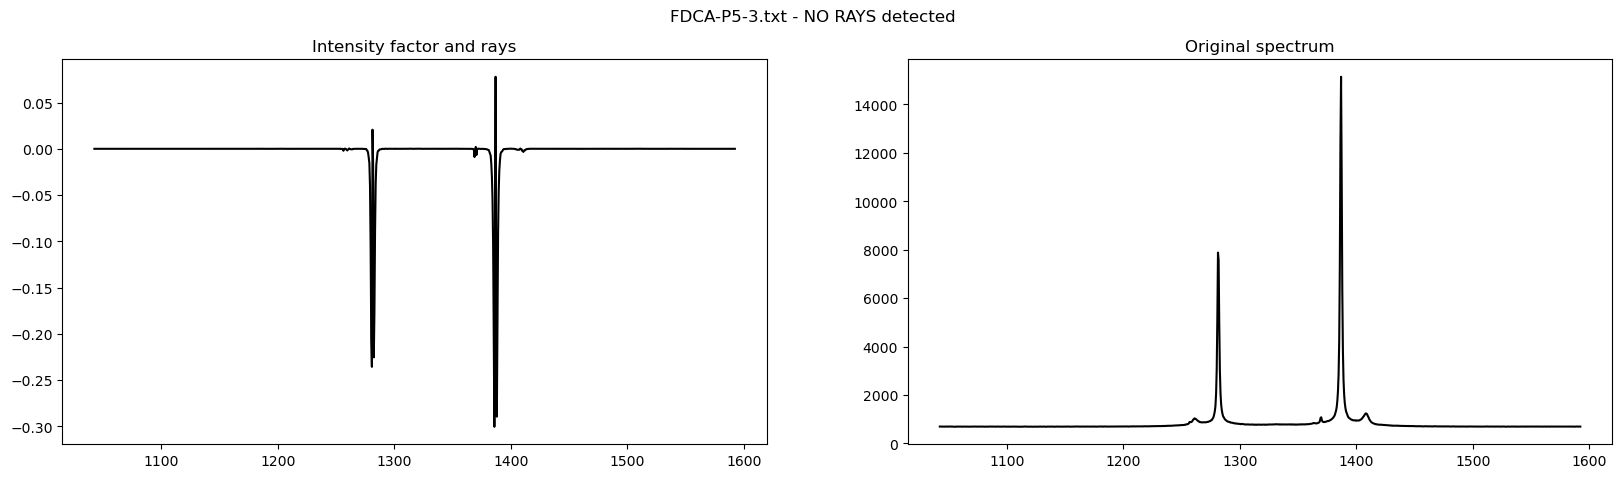

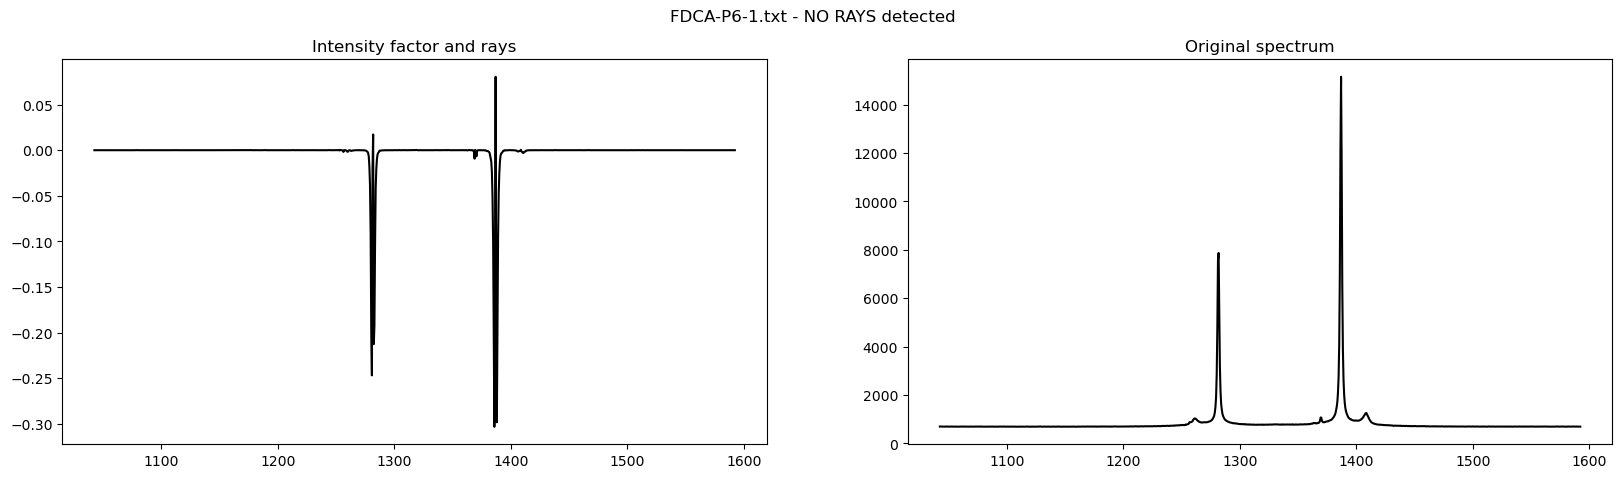

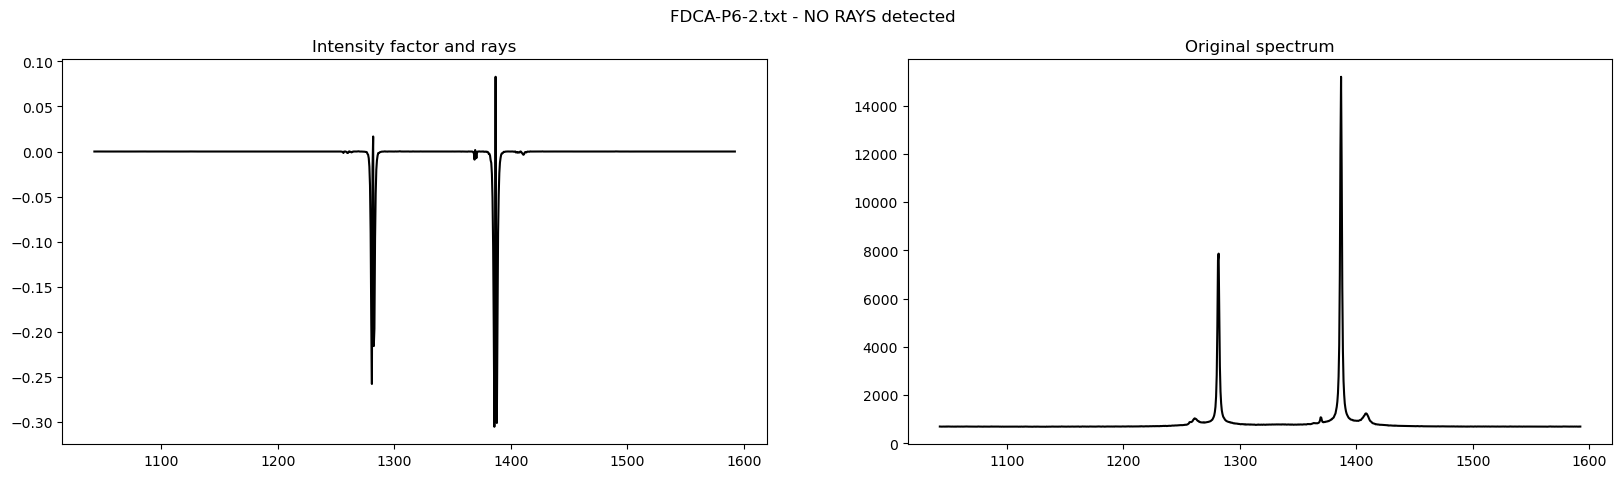

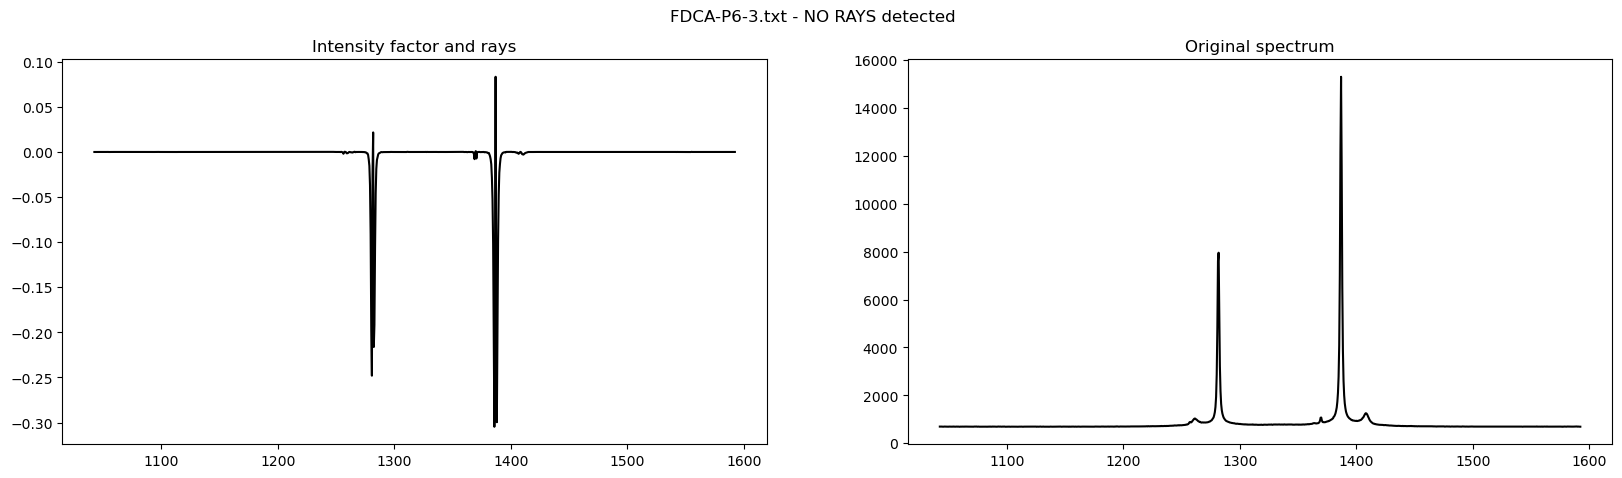

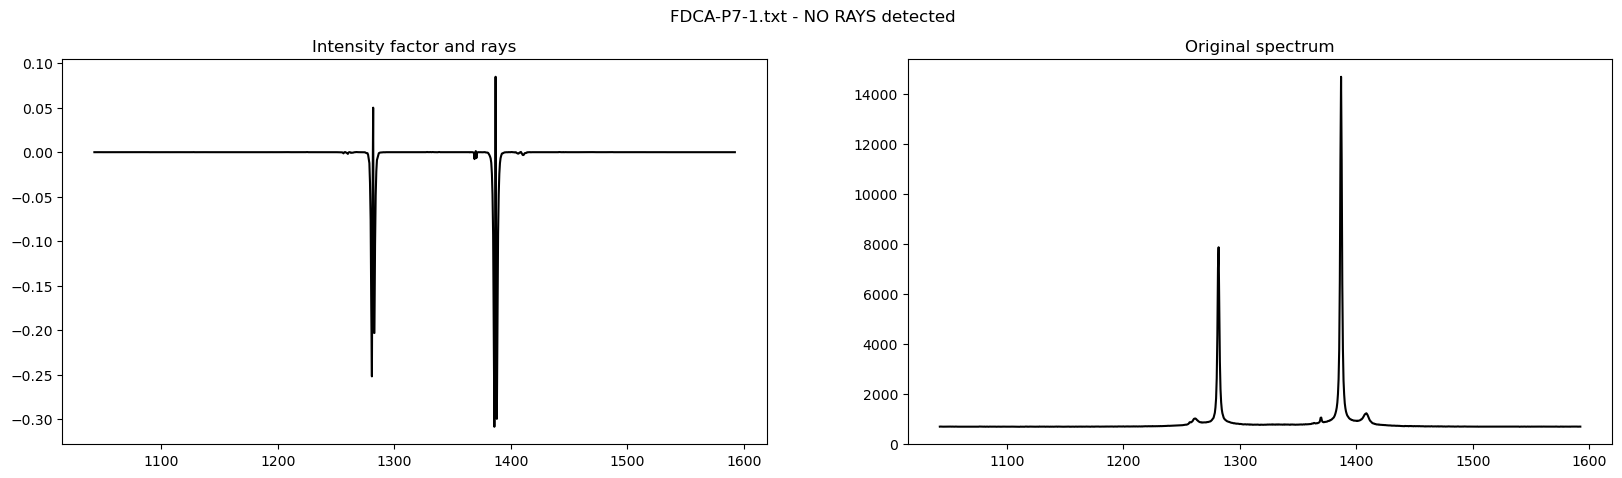

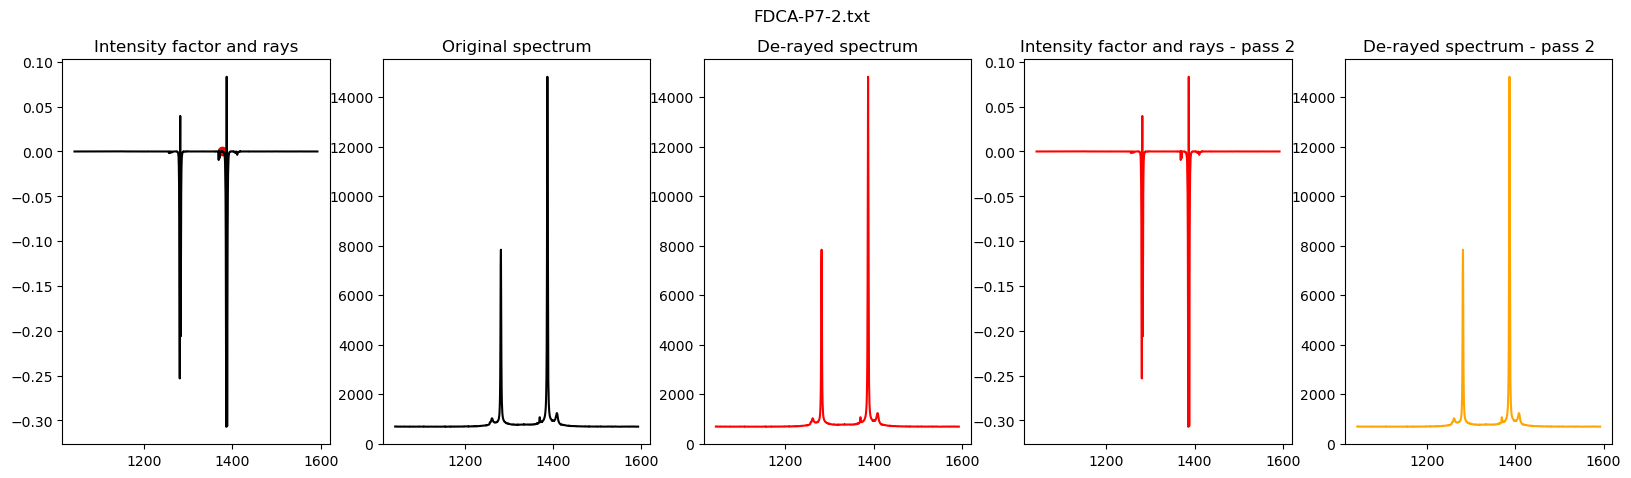

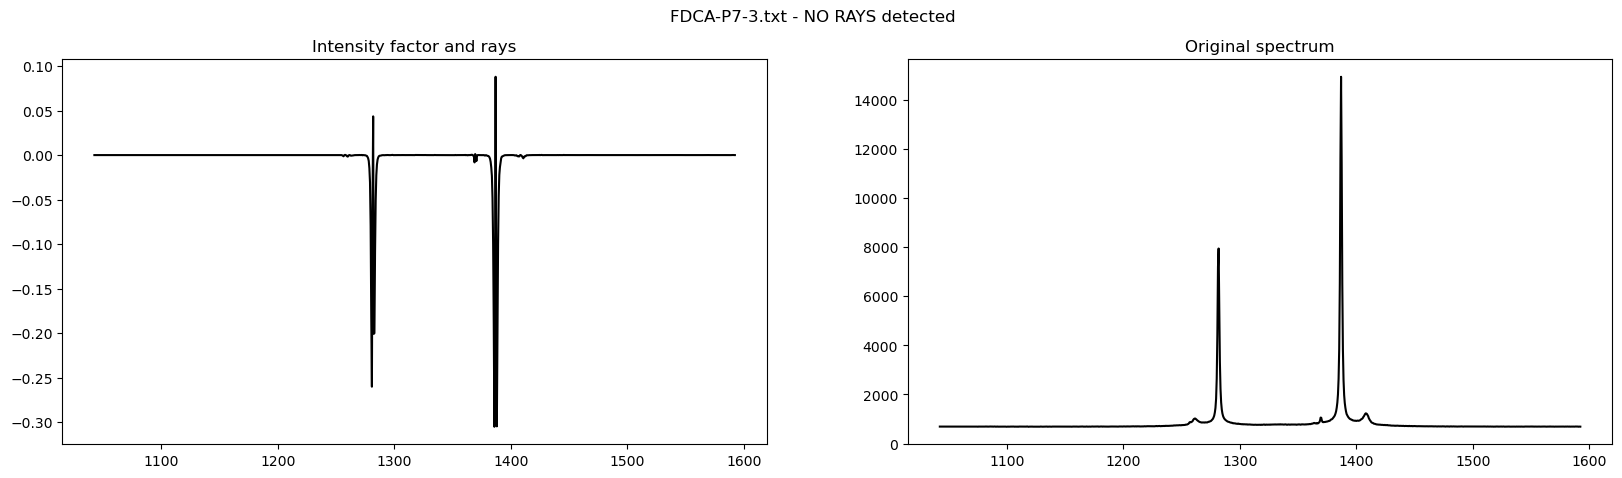

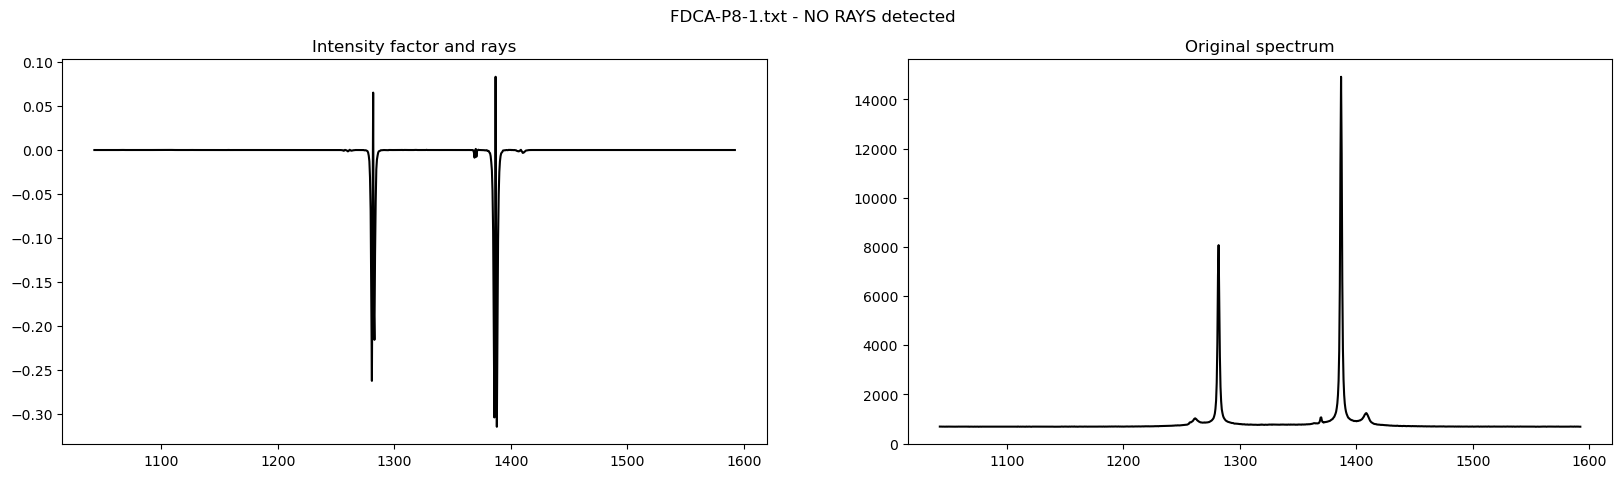

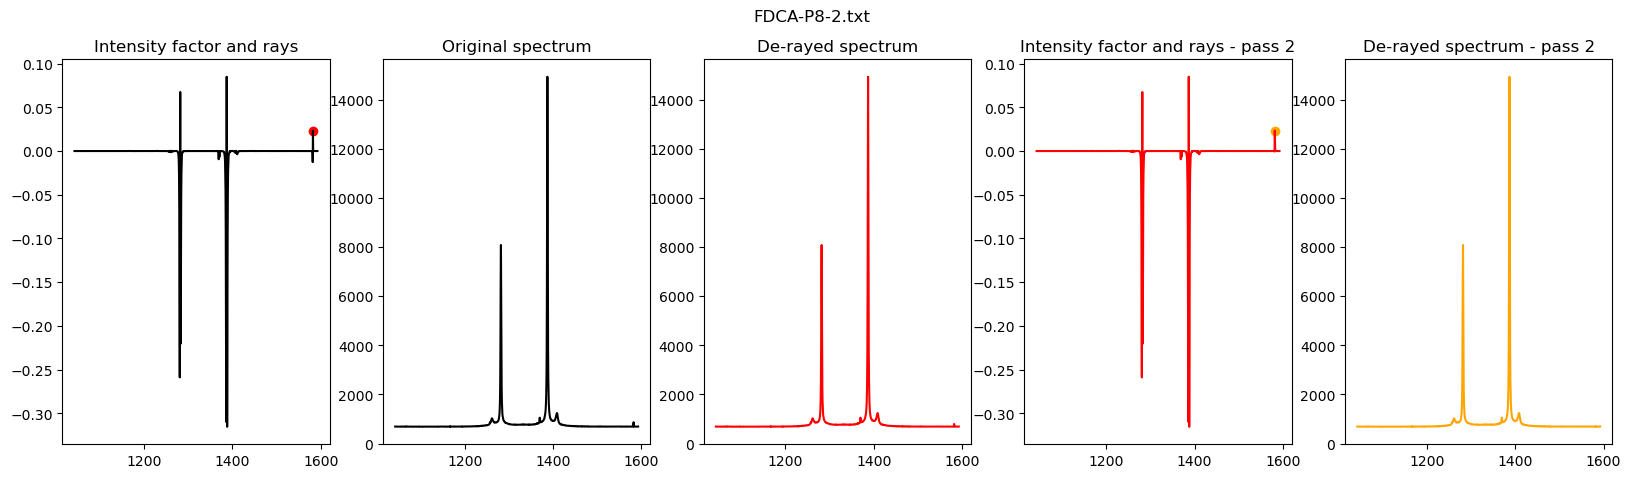

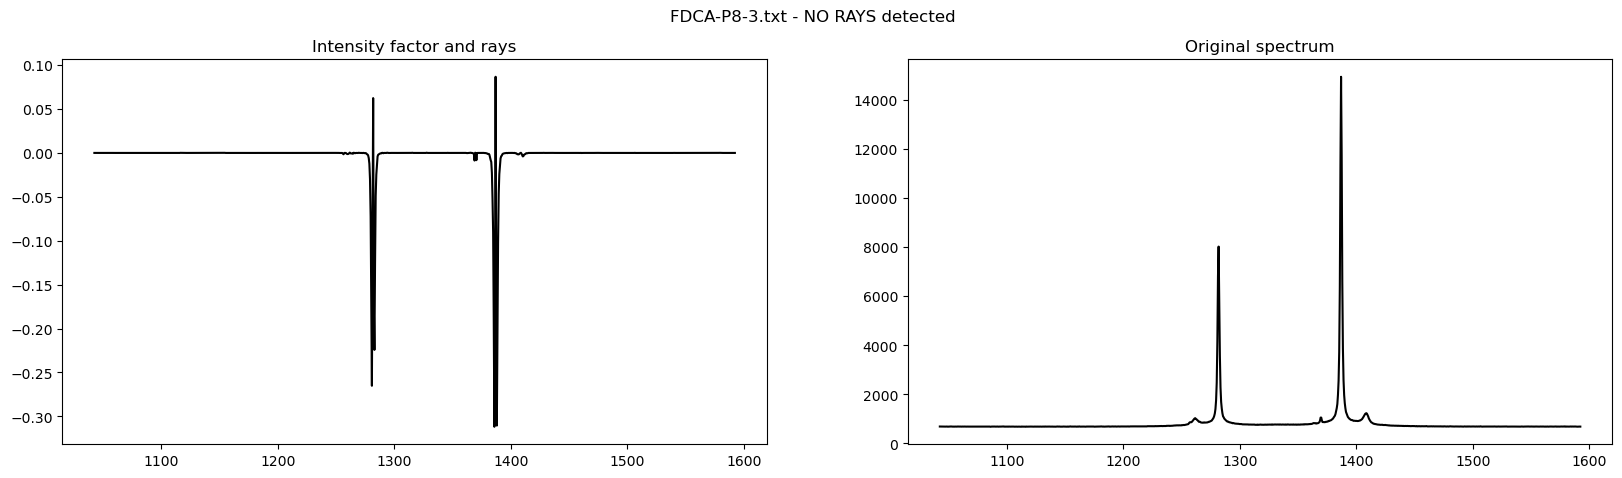

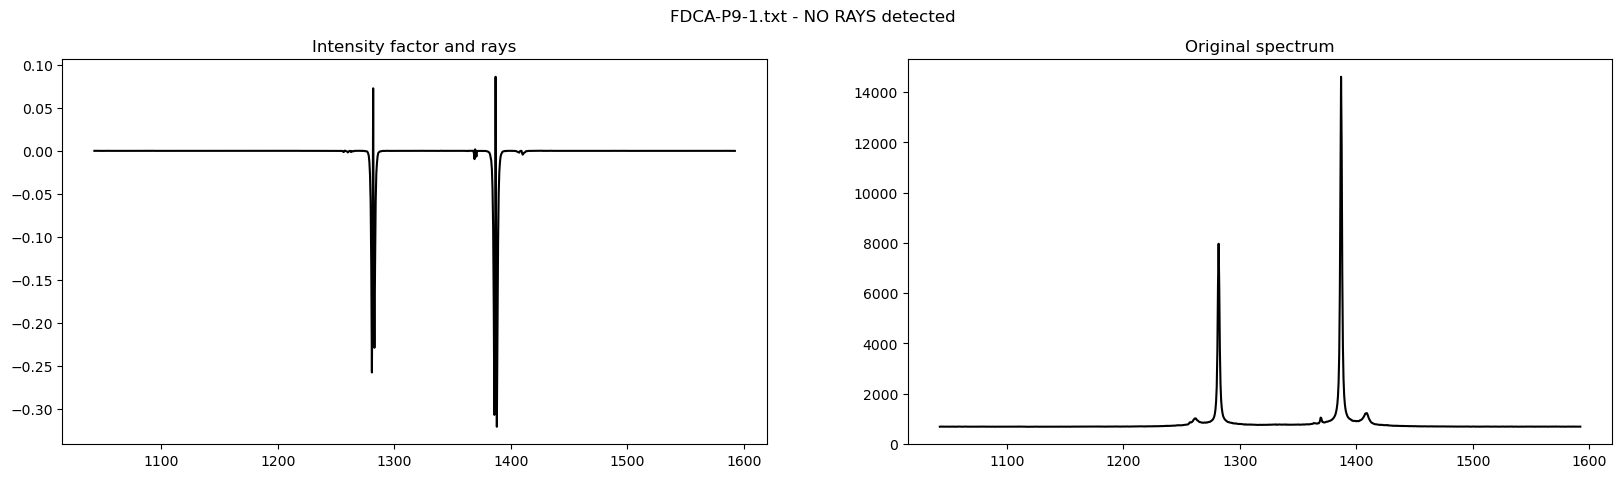

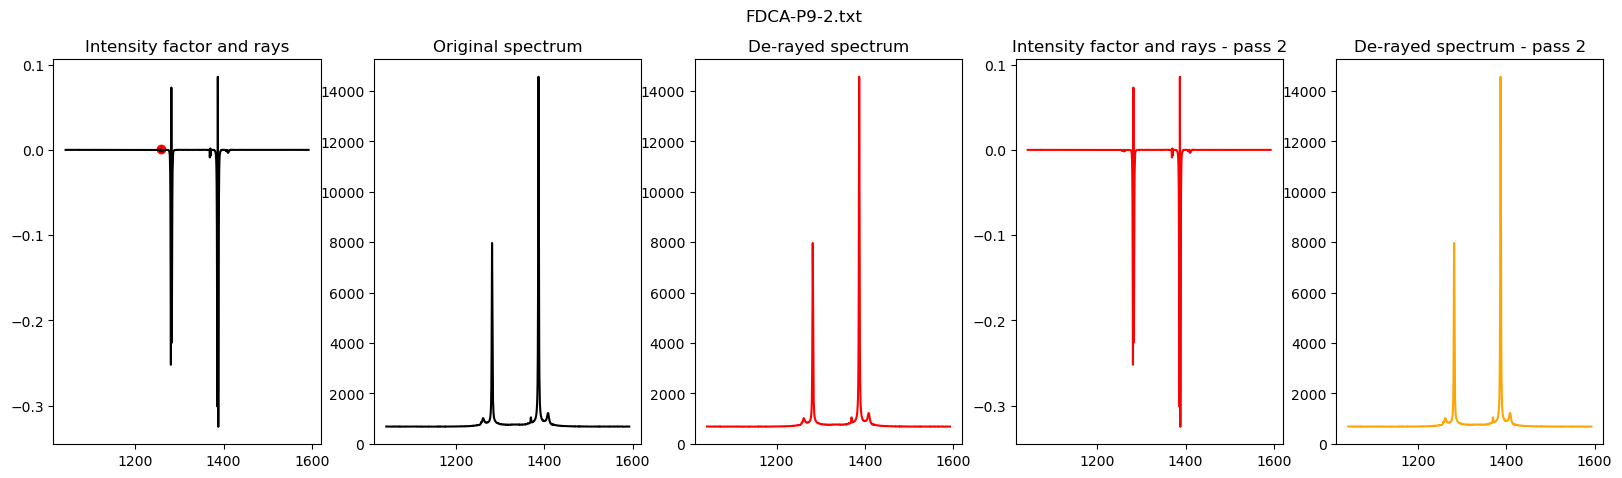

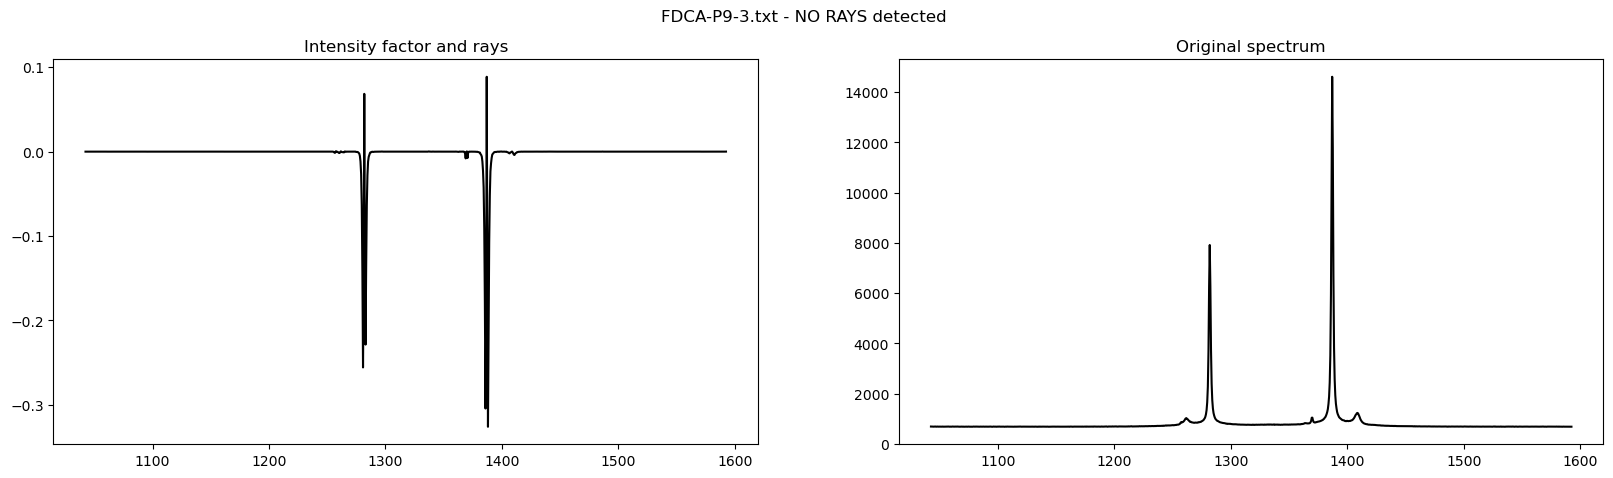

In [14]:
diad_peaks=fit_params[['Diad1_pos','Diad2_pos','HB1_pos','HB2_pos','C13_pos']]

data_y_all_crr,fit_params_crr=pf.cosmicray_filter.filter_raysinloop(Diad_files=Diad_files, spectra_path=spectra_path, 
                                                                    diad_peaks=diad_peaks,exclude_ranges=exclude_ranges,filetype=filetype,
                                                                    dynfact=dynfact,dynfact_2=dynfact_2,n=n,
                                      export_cleanspec=export_cleanspec,save_fig=save_fig,plot_rays=plot_rays,fit_params=fit_params)

### Plot peak parameters 
- This will help you inspect clear cut offs you can use to split your diads into groups for fitting
- You can enter different x and y coordinates from the dataframe headings above

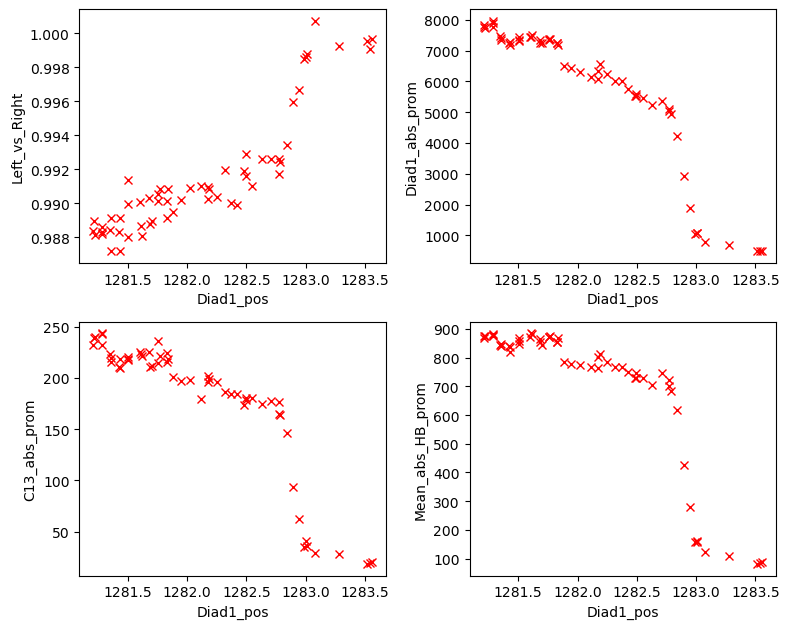

In [15]:
fig=pf.plot_peak_params(fit_params=fit_params_crr, 
                     x_param='Diad1_pos',  y1_param='Left_vs_Right',
                    y2_param='Diad1_abs_prom', y3_param='C13_abs_prom',
                    y4_param='Mean_abs_HB_prom', fill_na=-1000)

### Filter out ones with really bad splitting or really low diad prominence
- Here, we only take files with splitting between 101-108 (you will need to tweak this for each instrument)
- We also only take files with a prominence of diad 1 >10
- None here got filtered out, but these can be helpful filters on other datasets

Keeping N=58
Discarding N=0


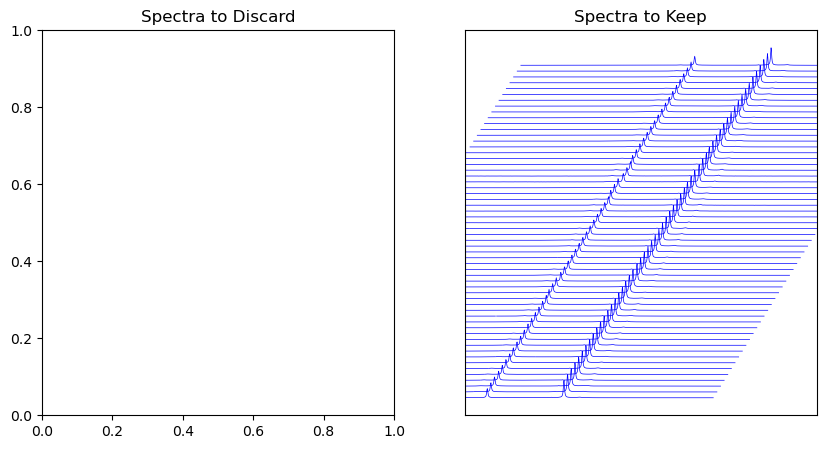

In [16]:
fit_params_filt, data_y_filt, fit_params_disc, data_y_disc=pf.filter_splitting_prominence(
fit_params=fit_params_crr, data_y_all=data_y_all_crr, x_cord=Diad[:, 0],
splitting_limits=[101, 108], lower_diad1_prom=10)

### Now apply filters to find the weakest diads (e.g. ones you wouldnt want to fit a hotband too)
- In this case, we find the best filters are the position of Diad1 (shifts way more than Diad2), 
and where HB2 had a prominence (e.g., not nan because it wasnt found) 
- We find it also helpful to apply a filter, e.g. weak is Diad1pos<1287 or HB2 prominence nan, and  the prominence of Diad1 is <300X the standard deviation of the diad region

Index(['filename', 'rays_present', 'approx_split', 'Diad1_pos', 'Diad2_pos',
       'HB1_pos', 'HB2_pos', 'C13_pos', 'Diad1_abs_prom', 'Diad2_abs_prom',
       'HB1_abs_prom', 'HB2_abs_prom', 'C13_abs_prom', 'Mean_abs_HB_prom',
       'Diad2_HB2_abs_prom_ratio', 'Diad1_HB1_abs_prom_ratio',
       'Diad1_rel_prom', 'Diad2_rel_prom', 'HB1_rel_prom', 'HB2_rel_prom',
       'C13_rel_prom', 'Diad1_HB1_Valley_prom', 'Mean_Diad_HB_Valley_prom',
       'Diad1_prom/std_betweendiads', 'Diad2_prom/std_betweendiads',
       'Av_Diad_prom/std_betweendiads', 'C13_prom/HB2_prom',
       'Av_Diad_HB_prom_ratio', 'Left_vs_Right', 'Diad2_height', 'HB2_height',
       'C13_height', 'Diad1_height', 'HB1_height', 'Diad1_Median_Bck',
       'Diad2_Median_Bck', 'C13_HB2_abs_prom_ratio', 'Diad2_HB2_Valley_prom',
       'HB1_prom/std_betweendiads', 'HB2_prom/std_betweendiads'],
      dtype='object')

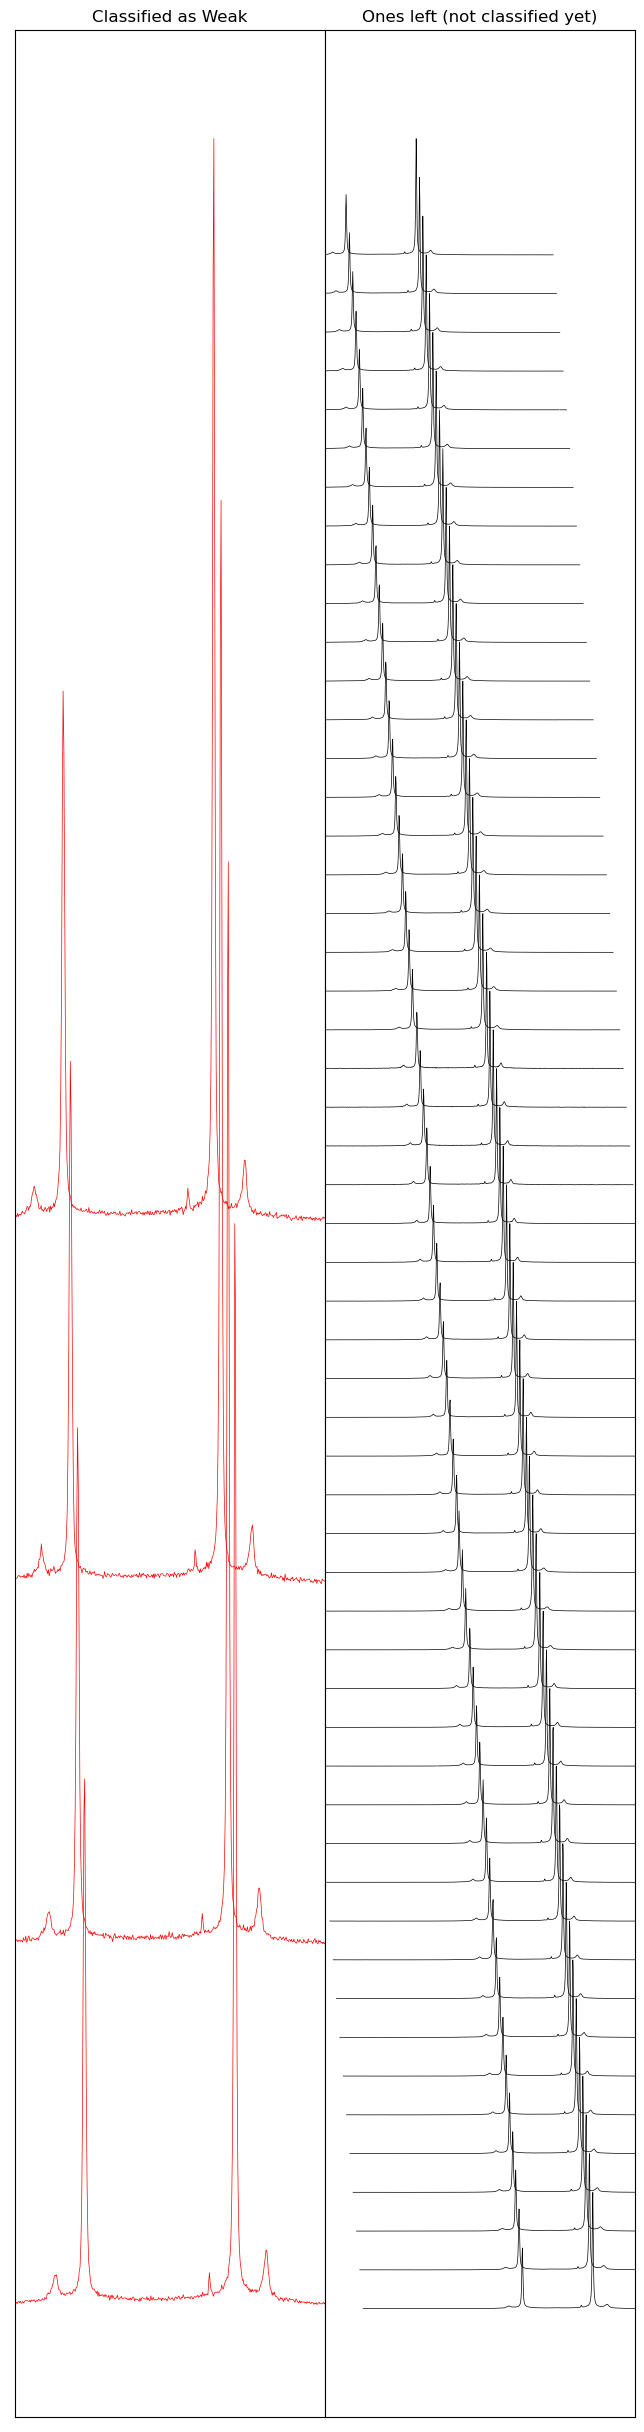

In [17]:
Filter1=(fit_params['C13_abs_prom']<10) # any C13 absolute prominence <10 is considered weak
Filter2=(fit_params['Left_vs_Right']>1.1) | (fit_params['Left_vs_Right']<0.95) # This is for spectra with high background
Filter3=(fit_params['HB1_abs_prom']<30)|(fit_params['HB2_abs_prom']<50)
Filter4=(fit_params['Diad1_HB1_Valley_prom']<1.01)|(fit_params['Diad2_HB2_Valley_prom']<1.01)
Filter5=(fit_params['Diad1_abs_prom']<700)
filter_bool=Filter1+Filter3+Filter5+Filter4
fit_params_Weak, fit_params_NotWeak, data_y_Weak, data_y_NotWeak=pf.identify_diad_group(
    fit_params=fit_params_filt, 
     data_y=data_y_filt, 
    x_cord=Diad[:, 0], 
    y_fig_scale=0.5,
    filter_bool=filter_bool, grp_filter='Weak')

display(fit_params_NotWeak.columns)


## Seperate Medium and strong diads
- Now we need to find something that separates out strong diads from medium strength diads
- The aim here is to get diads that are sufficiently strong that you have to fit a gaussian background in addition to diads, hbs and C13 peaks. Not having to fit a gaussian background to medium density diads will save you a lot of computational time (and decrease the number of bad fits)
- In many datasets, you wont need a strong diad category. In which case, everything will stay in the 'Medium' Category
- Here, the best filter appears to be the prominence of the C13 peak, and the general elevation of the valley between diad and HB above the background outside the diad positions (Mean_Diad_HB variable). 

In [18]:
fit_params_NotWeak.columns

Index(['filename', 'rays_present', 'approx_split', 'Diad1_pos', 'Diad2_pos',
       'HB1_pos', 'HB2_pos', 'C13_pos', 'Diad1_abs_prom', 'Diad2_abs_prom',
       'HB1_abs_prom', 'HB2_abs_prom', 'C13_abs_prom', 'Mean_abs_HB_prom',
       'Diad2_HB2_abs_prom_ratio', 'Diad1_HB1_abs_prom_ratio',
       'Diad1_rel_prom', 'Diad2_rel_prom', 'HB1_rel_prom', 'HB2_rel_prom',
       'C13_rel_prom', 'Diad1_HB1_Valley_prom', 'Mean_Diad_HB_Valley_prom',
       'Diad1_prom/std_betweendiads', 'Diad2_prom/std_betweendiads',
       'Av_Diad_prom/std_betweendiads', 'C13_prom/HB2_prom',
       'Av_Diad_HB_prom_ratio', 'Left_vs_Right', 'Diad2_height', 'HB2_height',
       'C13_height', 'Diad1_height', 'HB1_height', 'Diad1_Median_Bck',
       'Diad2_Median_Bck', 'C13_HB2_abs_prom_ratio', 'Diad2_HB2_Valley_prom',
       'HB1_prom/std_betweendiads', 'HB2_prom/std_betweendiads'],
      dtype='object')

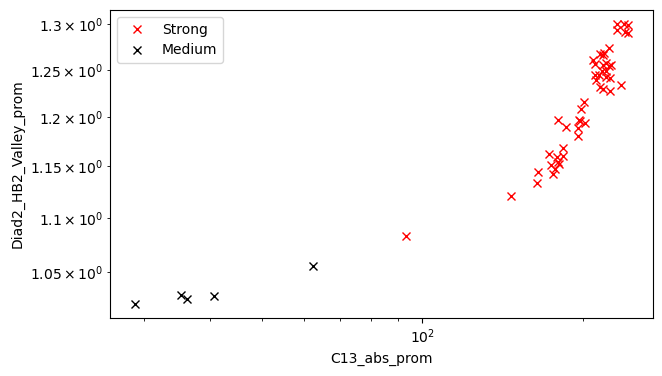

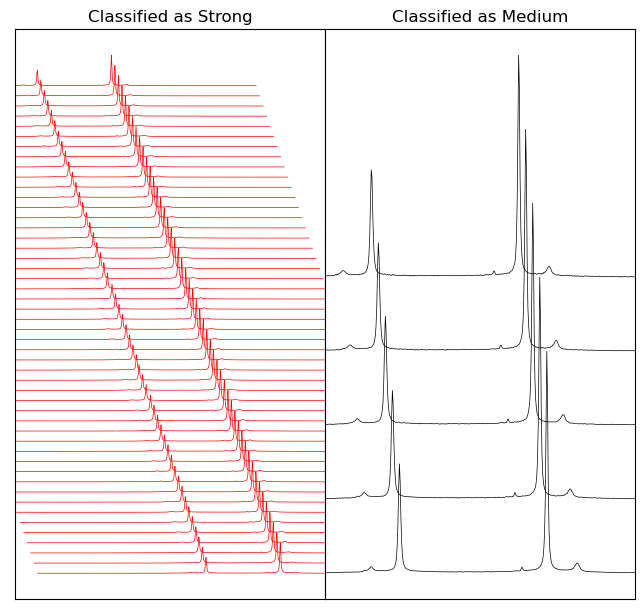

In [19]:
var1='C13_abs_prom'
var2='Diad2_HB2_Valley_prom'#'HB2_prom/std_betweendiads'
filter_bool_Strong=((fit_params_NotWeak[var1]>70)
                    &(fit_params_NotWeak[var2]>1))
# Here we make a plot of these parameters to better help select the right values
fig, (ax1) = plt.subplots(1, 1, figsize=(7,4))
ax1.plot(fit_params_NotWeak[var1].loc[filter_bool_Strong],
         fit_params_NotWeak[var2].loc[filter_bool_Strong], 'xr', label='Strong')
ax1.plot(fit_params_NotWeak[var1].loc[~filter_bool_Strong],
         fit_params_NotWeak[var2].loc[~filter_bool_Strong], 'xk', label='Medium')

if fit_params_NotWeak.empty==False:
    ax1.set_yscale('log')
    ax1.set_xscale('log')
else:
    ax1.annotate('Word of warning: No medium spectra IDed!', xy=(0, 0), xytext=(0, 0),ha='center')
    
ax1.set_xlabel(var1)
ax1.set_ylabel(var2)
ax1.legend()
#This makes a plot
fit_params_Strong, fit_params_Medium, data_y_Strong, data_y_Medium=pf.identify_diad_group(
    fit_params=fit_params_NotWeak.reset_index(drop=True), 
    data_y=data_y_NotWeak,x_cord=Diad[:, 0], 
    filter_bool=filter_bool_Strong, y_fig_scale=0.1, grp_filter='Medium-Strong')

## Plot them all 

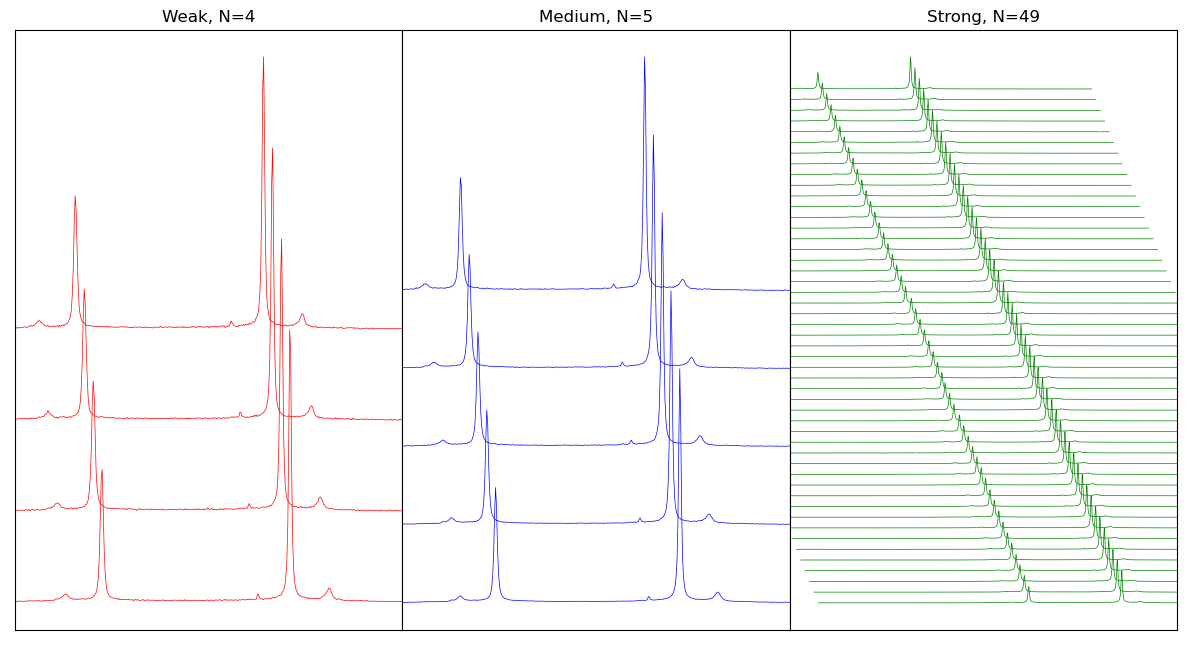

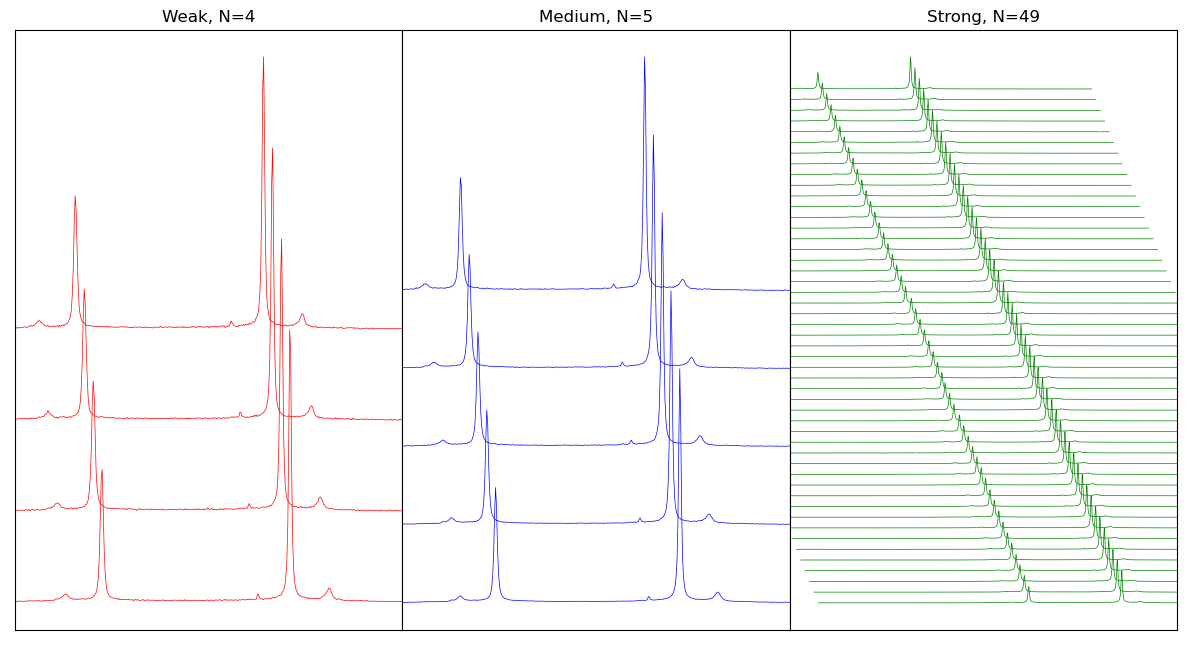

In [20]:
pf.plot_diad_groups(x_cord=Diad[:, 0], Weak_np=data_y_Weak,
                 Medium_np=data_y_Medium, Strong_np=data_y_Strong,
                   y_fig_scale=0.1)

## Now lets save these lists, and we load them in another notebook

In [70]:
import joblib
joblib.dump(Diad[:, 0], group_path+'/'+'np_x.sav')
joblib.dump(fit_params_Weak.reset_index(drop=True), group_path+'/'+'Weak_df.sav')
joblib.dump(fit_params_Medium.reset_index(drop=True), group_path+'/'+'Medium_df.sav')
joblib.dump(fit_params_Strong.reset_index(drop=True), group_path+'/'+'Strong_df.sav')
fit_params_disc.to_excel(group_path+'/'+'Discarded_df.xlsx')
